# A Soccer Prediction Model and Data Analysis

## Introduction

Soccer is the most popular sport in Europe. Every season, many teams from different countries in Europe compete with each other. This makes soccer a popular sport in bettings too. According to the estimates betting industry in the world is valued at [$195 billion](https://www.statista.com/topics/1740/sports-betting/#dossierKeyfigures), and soccer accounts for %71 percent of [this value.](https://totalfootballanalysis.com/opinion/football-betting-the-global-gambling-industry-worth-billions)

For a betting company, forecasting the match results could be a vital tool. In this project, we will try to forecast future matches based on the historical data. In order to achieve this, we will analyze the data we have and gain insights about football. We will identify countries, teams and players, and see how they affect the overall result of a match. With this information, we will move on to create a machine learning model to estimate future matches. 

## Methodology

For this project, various exploratory analysis and machine learning techniques were used. Graphical software were used to gain insight from data. Statistical tests were used to confirm our assumptions. Finally, machine learning models were used to predict future matches.

Following libraries were used for this project:

 - Pandas
 - Sqlite3
 - Numpy
 - Matplotlib
 - Seaborn
 - Plotly
 - Geopandas
 - Scikit Learn
 - Statsmodels

## Data Preparation

In [499]:
import pandas as pd
import numpy as np
import sqlite3
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
from shapely.geometry import Polygon
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, cross_validate, TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import statsmodels

In [500]:
colors = ['#74d434', '#4c8527', '#9aad55', '#ccbc94', '#3e5a2c']
soccer_colors = sns.color_palette(colors)
sns.set_palette(soccer_colors)

In [501]:
pd.set_option('display.max_columns', None)

### Data Import

In [502]:
conn = sqlite3.connect('database.sqlite')
def read_query(query, conn=conn):
    return pd.read_sql(query, conn)

In [503]:
table_names = read_query("SELECT name AS table_names FROM sqlite_master WHERE type='table'")
table_names

,table_names
0,sqlite_sequence
1,Player_Attributes
2,Player
3,Match
4,League
5,Country
6,Team
7,Team_Attributes


In [504]:
player_info = read_query("SELECT * FROM Player_Attributes")
player_info.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [505]:
player = read_query("SELECT * FROM Player")
player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [506]:
player_stats = pd.read_csv('player_stats.csv')
player_stats.head()

,League,Team,Season,KEY,Player,Position,Appearances,Goals,Started,Started As A Sub,Came On,Taken Off,Own Goals,Type Of Goal,First Half,Second Half,First Scorer,Last Scorer,Home,Away,Right Foot,Left Foot,Header,Other Method,Open Play,Cross,Free Kick,Direct Free Kick,Throw In,Penalty,Corner,Other Type Of Play,Minutes played,Min/goal,Assists,% Assists,Leading Recipient,Recipient Goals,CS,% Clean Sheets,Hat Tricks,Yellow Cards,Yellow - First Half,Yellow - Second Half,Yellow - Home,Yellow - Away,Yelow - Minutes Played,Minutes per Yellow Cards,Sent Off,Straight Red Card,Two Yellow Cards,Red - First Half,Red - Second Half,Red - Home,Red - Away,Red - Minutes Played,Minutes per Red Cards
0,Premier League,Chelsea,2014/15,Premier League|Chelsea|2014/15,NaN,NaN,NaN,72,NaN,NaN,NaN,NaN,NaN,Team,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48,8,1,1,-,4,10,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Premier League,Chelsea,2014/15,Premier League|Chelsea|2014/15,Eden Hazard,Midfielder,38.0,14,38.0,0.0,0.0,12.0,0.0,Player,11,3,9,7,9,5,6,5,3,-,8,2,-,-,-,3,1,-,3379.0,241.0,9.0,13.0,Loic Remy,3.0,NaN,NaN,NaN,2,1,1,-,2,3379.0,1689.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Premier League,Chelsea,2014/15,Premier League|Chelsea|2014/15,John Terry,Defender,38.0,5,38.0,0.0,0.0,0.0,1.0,Player,3,2,3,1,2,3,1,2,2,-,1,-,-,-,-,-,4,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,-,1,1,3420.0,1710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Premier League,Chelsea,2014/15,Premier League|Chelsea|2014/15,Branislav Ivanovic,Defender,38.0,4,38.0,0.0,0.0,0.0,0.0,Player,3,1,1,2,1,3,3,1,-,-,3,-,-,-,-,-,1,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,2,9,6,5,3420.0,310.91,1.0,-,1,-,1,-,1,3420.0,3420.0
4,Premier League,Chelsea,2014/15,Premier League|Chelsea|2014/15,Nemanja Matic,Midfielder,36.0,1,35.0,1.0,1.0,1.0,0.0,Player,-,1,-,-,-,1,-,1,-,-,1,-,-,-,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,4,6,4,6,3124.0,312.4,1.0,1,-,-,1,1,-,3164.0,3164.0


In [507]:
match = read_query("SELECT * FROM Match")
match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [508]:
read_query("SELECT * FROM country")

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [509]:
league = read_query("""SELECT l.id AS country_id, l.name AS league_name,
           c.name AS country
           FROM League AS l
           LEFT JOIN Country AS c
           ON l.id = c.id""")
league

,country_id,league_name,country
0,1,Belgium Jupiler League,Belgium
1,1729,England Premier League,England
2,4769,France Ligue 1,France
3,7809,Germany 1. Bundesliga,Germany
4,10257,Italy Serie A,Italy
5,13274,Netherlands Eredivisie,Netherlands
6,15722,Poland Ekstraklasa,Poland
7,17642,Portugal Liga ZON Sagres,Portugal
8,19694,Scotland Premier League,Scotland
9,21518,Spain LIGA BBVA,Spain


In [510]:
team = read_query("SELECT * FROM Team")
team

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


In [511]:
team_info = read_query("SELECT * FROM Team_Attributes")
team_info.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


### Duplicate Values

In [512]:
def duplicate_vals(col):
    dups = read_query(f"SELECT * FROM {col}\
            ").duplicated().sum()
    print(f"Duplicate rows in {col}: {dups}")

In [513]:
tables = list(table_names['table_names'])[1:]
for i in tables:
    duplicate_vals(i)

Duplicate rows in Player_Attributes: 0
Duplicate rows in Player: 0
Duplicate rows in Match: 0
Duplicate rows in League: 0
Duplicate rows in Country: 0
Duplicate rows in Team: 0
Duplicate rows in Team_Attributes: 0


There are no duplicate values in this dataset.

### Data Types and Missing Values

In [514]:
player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


Player table does not contain any missing values.

In [515]:
player['birthday'] = pd.to_datetime(player['birthday'])

In [516]:
player_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

There are some missing values in multiple columns in this table. We need to check whether they are in the same rows.

In [517]:
player_info['date'] = pd.to_datetime(player_info['date'])

<AxesSubplot:>

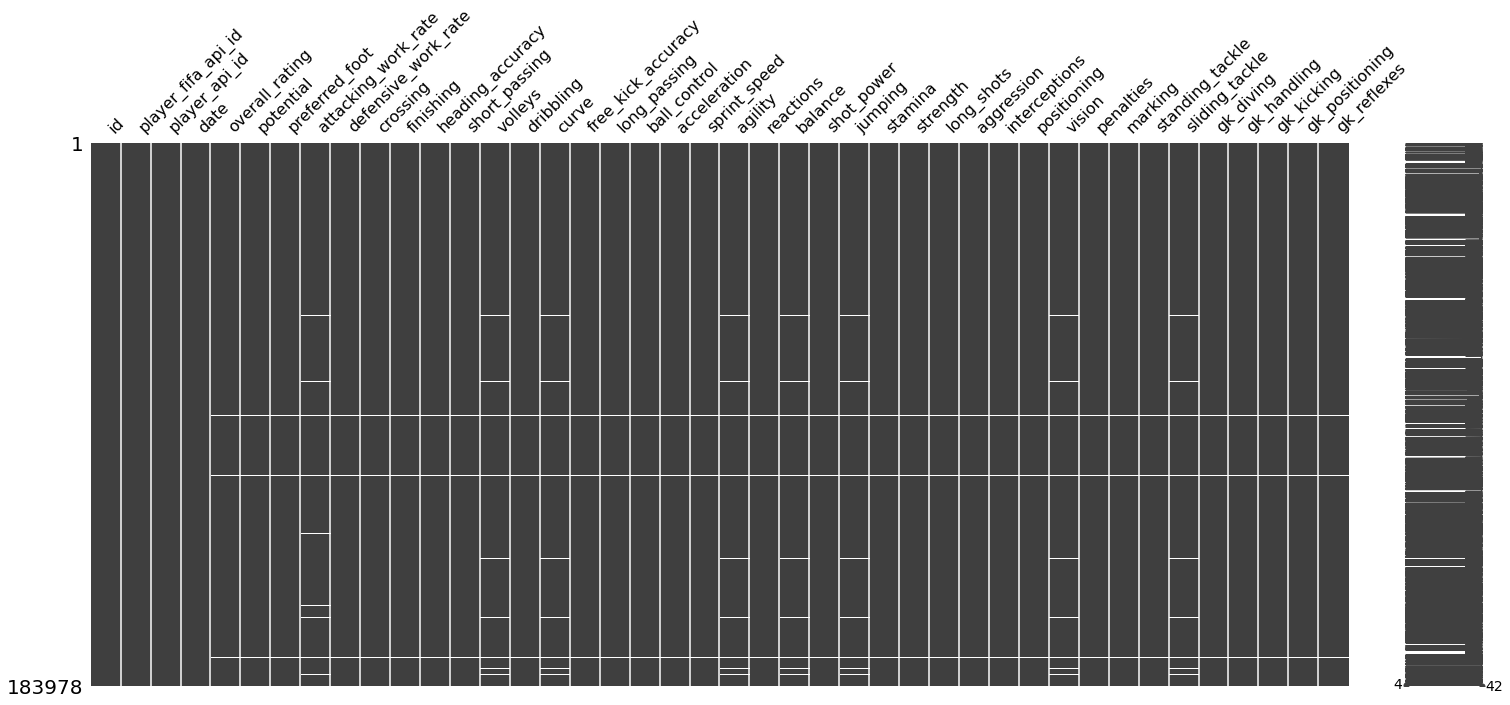

In [518]:
msno.matrix(player_info)

Most missing data are in the same rows. We can easily get rid of them as they are not the majority. Before doing that, we will aggregate the data to gather average values for each player.

In [519]:
player_num = player_info.groupby(['player_fifa_api_id', 'player_api_id'])\
                        .agg('mean').reset_index()

relevant_cols = ['preferred_foot', 'attacking_work_rate',
                 'defensive_work_rate', 'player_fifa_api_id',
                 'player_api_id']

player_cat = player_info[relevant_cols].groupby(['player_fifa_api_id', 'player_api_id']).agg(pd.Series.mode).reset_index()

player_info = player_num.merge(player_cat, how='left', on=['player_api_id', 'player_fifa_api_id'])

<AxesSubplot:>

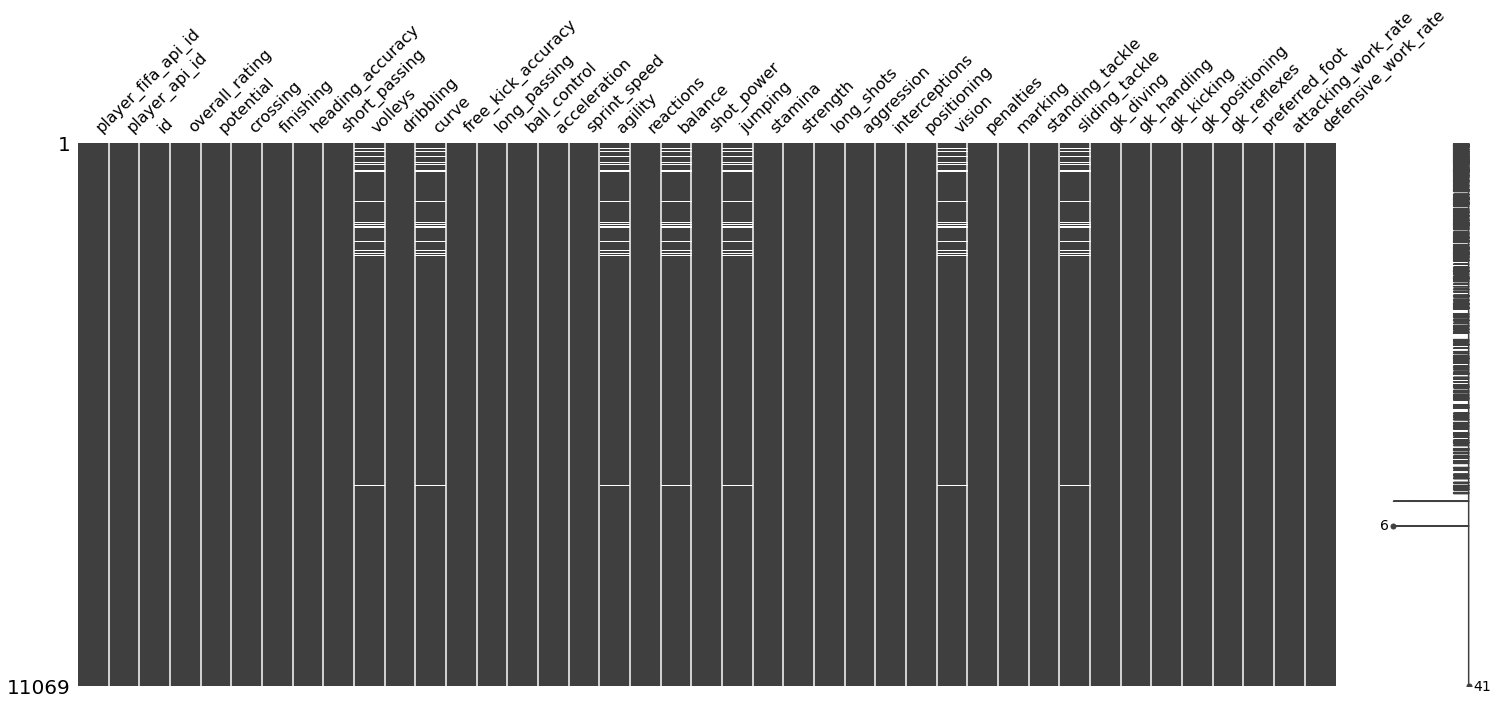

In [520]:
msno.matrix(player_info)

Now, there are less missing values. We will fill the ones left with the mean values.

In [521]:
player_info.fillna(player_info.mean(), inplace=True)

/var/folders/vb/n0dg28vd0fv6pq6p63_3f7900000gn/T/ipykernel_1415/3141292109.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [522]:
player = player.merge(player_info, how='left', on='player_api_id')

In [523]:
player_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4095 entries, 0 to 4094
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   League                    4095 non-null   object 
 1   Team                      4095 non-null   object 
 2   Season                    4095 non-null   object 
 3   KEY                       4095 non-null   object 
 4   Player                    3967 non-null   object 
 5   Position                  3967 non-null   object 
 6   Appearances               3967 non-null   float64
 7   Goals                     4095 non-null   int64  
 8   Started                   3967 non-null   float64
 9   Started As A Sub          3967 non-null   float64
 10  Came On                   3967 non-null   float64
 11  Taken Off                 3967 non-null   float64
 12  Own Goals                 3967 non-null   float64
 13  Type Of Goal              4095 non-null   object 
 14  First Ha

For this one, we are only interested in team names and players, missing data won't be a problem for this particular dataset.

In [524]:
match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [525]:
match.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 115 columns):
 #    Column            Dtype  
---   ------            -----  
 0    id                int64  
 1    country_id        int64  
 2    league_id         int64  
 3    season            object 
 4    stage             int64  
 5    date              object 
 6    match_api_id      int64  
 7    home_team_api_id  int64  
 8    away_team_api_id  int64  
 9    home_team_goal    int64  
 10   away_team_goal    int64  
 11   home_player_X1    float64
 12   home_player_X2    float64
 13   home_player_X3    float64
 14   home_player_X4    float64
 15   home_player_X5    float64
 16   home_player_X6    float64
 17   home_player_X7    float64
 18   home_player_X8    float64
 19   home_player_X9    float64
 20   home_player_X10   float64
 21   home_player_X11   float64
 22   away_player_X1    float64
 23   away_player_X2    float64
 24   away_player_X3    float64
 25   away_player_X4    fl

In [526]:
match['date'] = pd.to_datetime(match['date'])

In [527]:
print(match.isna().sum().to_string())

id                      0
country_id              0
league_id               0
season                  0
stage                   0
date                    0
match_api_id            0
home_team_api_id        0
away_team_api_id        0
home_team_goal          0
away_team_goal          0
home_player_X1       1821
home_player_X2       1821
home_player_X3       1832
home_player_X4       1832
home_player_X5       1832
home_player_X6       1832
home_player_X7       1832
home_player_X8       1832
home_player_X9       1832
home_player_X10      1832
home_player_X11      1832
away_player_X1       1832
away_player_X2       1832
away_player_X3       1832
away_player_X4       1832
away_player_X5       1832
away_player_X6       1832
away_player_X7       1832
away_player_X8       1832
away_player_X9       1833
away_player_X10      1833
away_player_X11      1839
home_player_Y1       1821
home_player_Y2       1821
home_player_Y3       1832
home_player_Y4       1832
home_player_Y5       1832
home_player_

<AxesSubplot:>

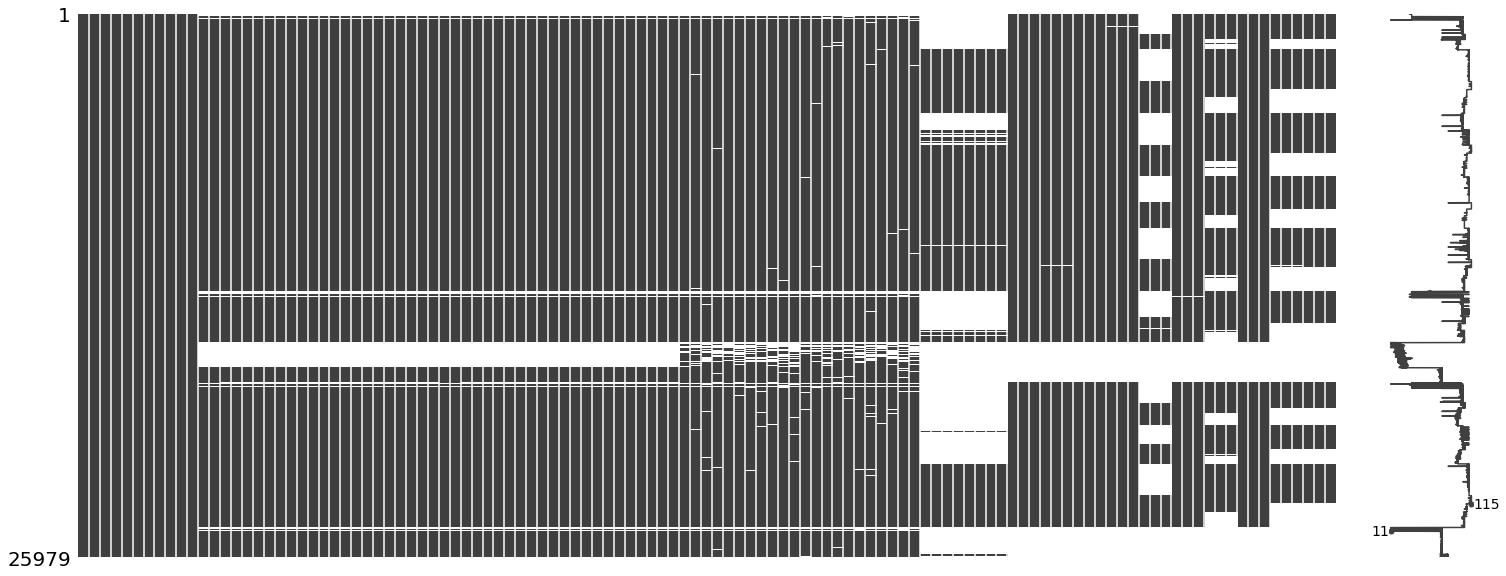

In [528]:
msno.matrix(match)

Match table has lots of missing values. However, some of the missing values are in columns that are not relevant to our case. We will drop those.

In [529]:
redundant_cols = list(match.iloc[:,77:].columns)
redundant_cols.extend(list(match.iloc[:,11:55]))

In [530]:
match.drop(redundant_cols, axis=1, inplace=True)

In [531]:
match.isna().sum()

id                     0
country_id             0
league_id              0
season                 0
stage                  0
date                   0
match_api_id           0
home_team_api_id       0
away_team_api_id       0
home_team_goal         0
away_team_goal         0
home_player_1       1224
home_player_2       1315
home_player_3       1281
home_player_4       1323
home_player_5       1316
home_player_6       1325
home_player_7       1227
home_player_8       1309
home_player_9       1273
home_player_10      1436
home_player_11      1555
away_player_1       1234
away_player_2       1278
away_player_3       1293
away_player_4       1321
away_player_5       1335
away_player_6       1313
away_player_7       1235
away_player_8       1341
away_player_9       1328
away_player_10      1441
away_player_11      1554
dtype: int64

<AxesSubplot:>

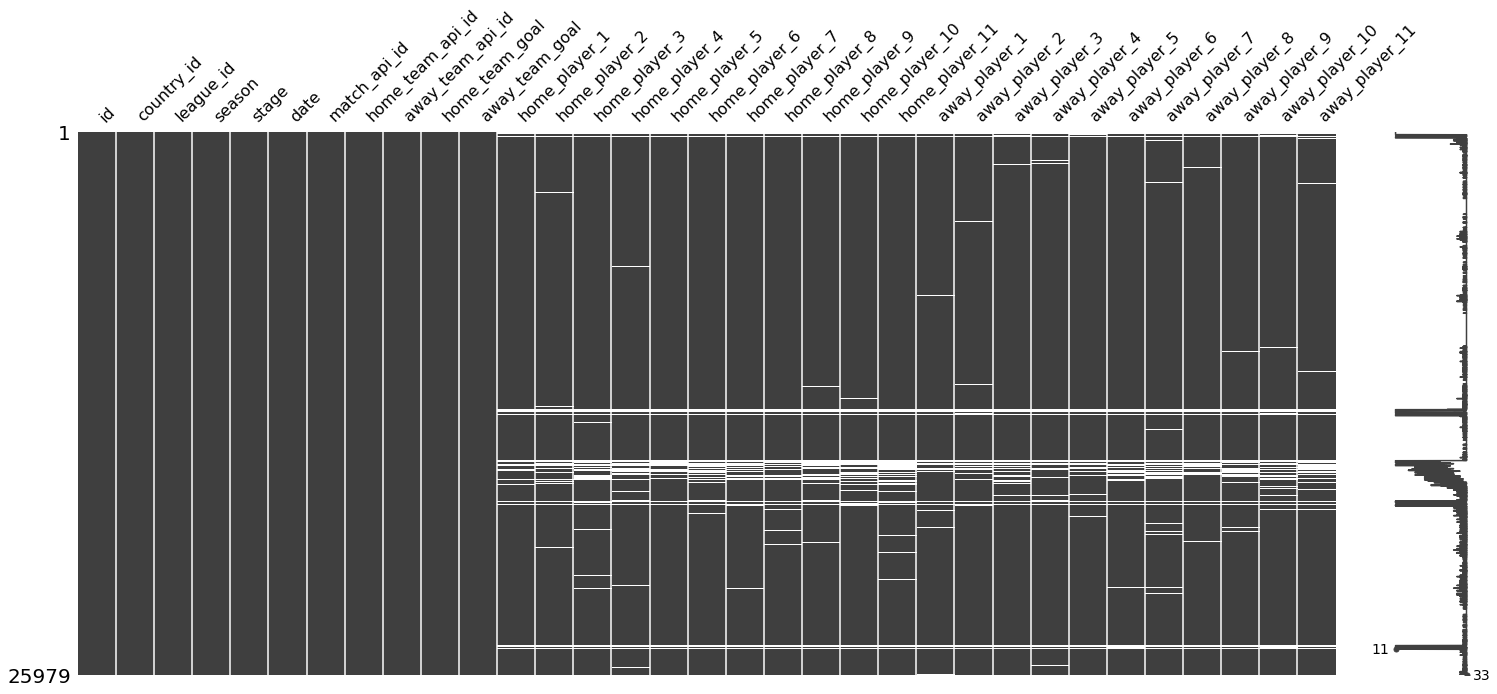

In [532]:
msno.matrix(match)

At this point, all missing values are in columns that are related to players. However, player information may not be relevant for the prediction model we will create. We will see if this is the case later in the analysis.

In [533]:
match_with_players = match.dropna()

In [534]:
float_cols = match_with_players.select_dtypes(include='float').columns
match_with_players[float_cols] = match_with_players[float_cols].astype('int') 

/var/folders/vb/n0dg28vd0fv6pq6p63_3f7900000gn/T/ipykernel_1415/3289122621.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [535]:
match = match.iloc[:,:11]

<AxesSubplot:>

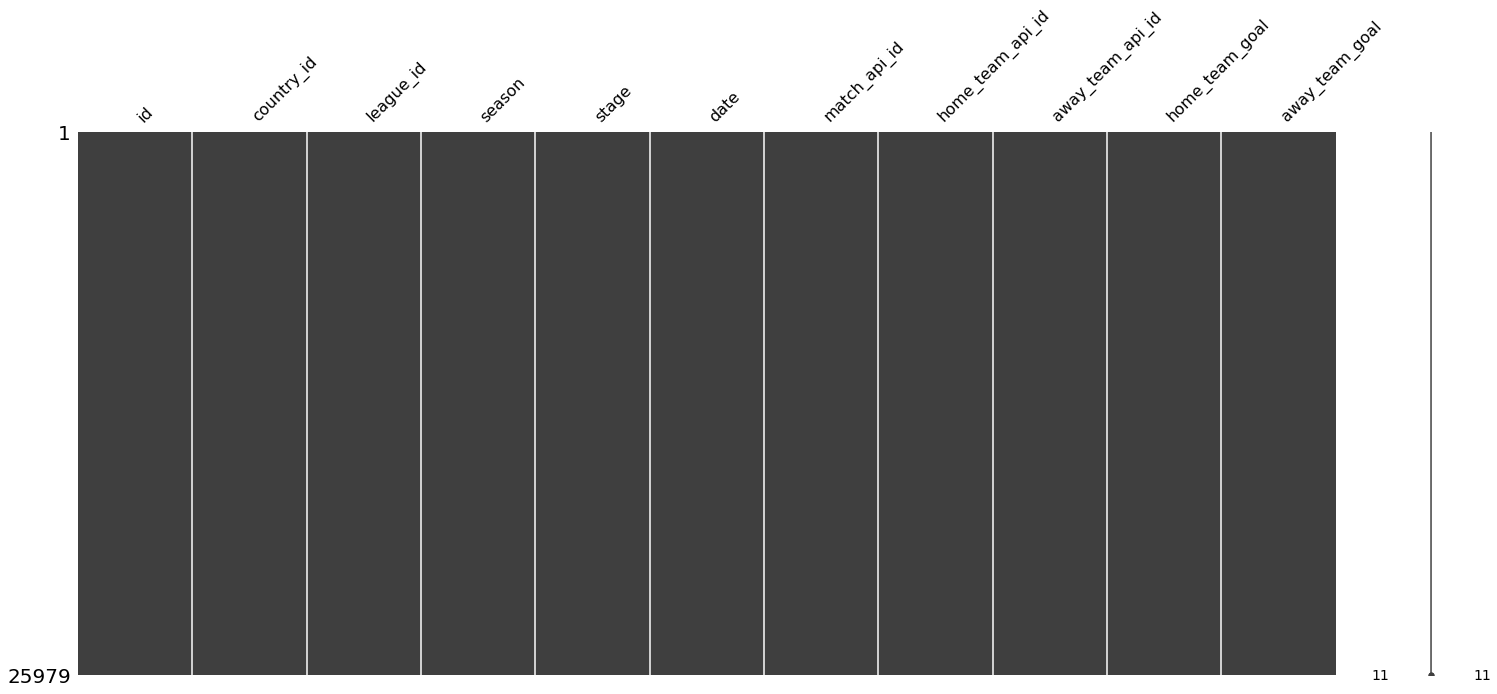

In [536]:
msno.matrix(match)

In [537]:
league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   country_id   11 non-null     int64 
 1   league_name  11 non-null     object
 2   country      11 non-null     object
dtypes: int64(1), object(2)
memory usage: 392.0+ bytes


In [538]:
team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


<AxesSubplot:>

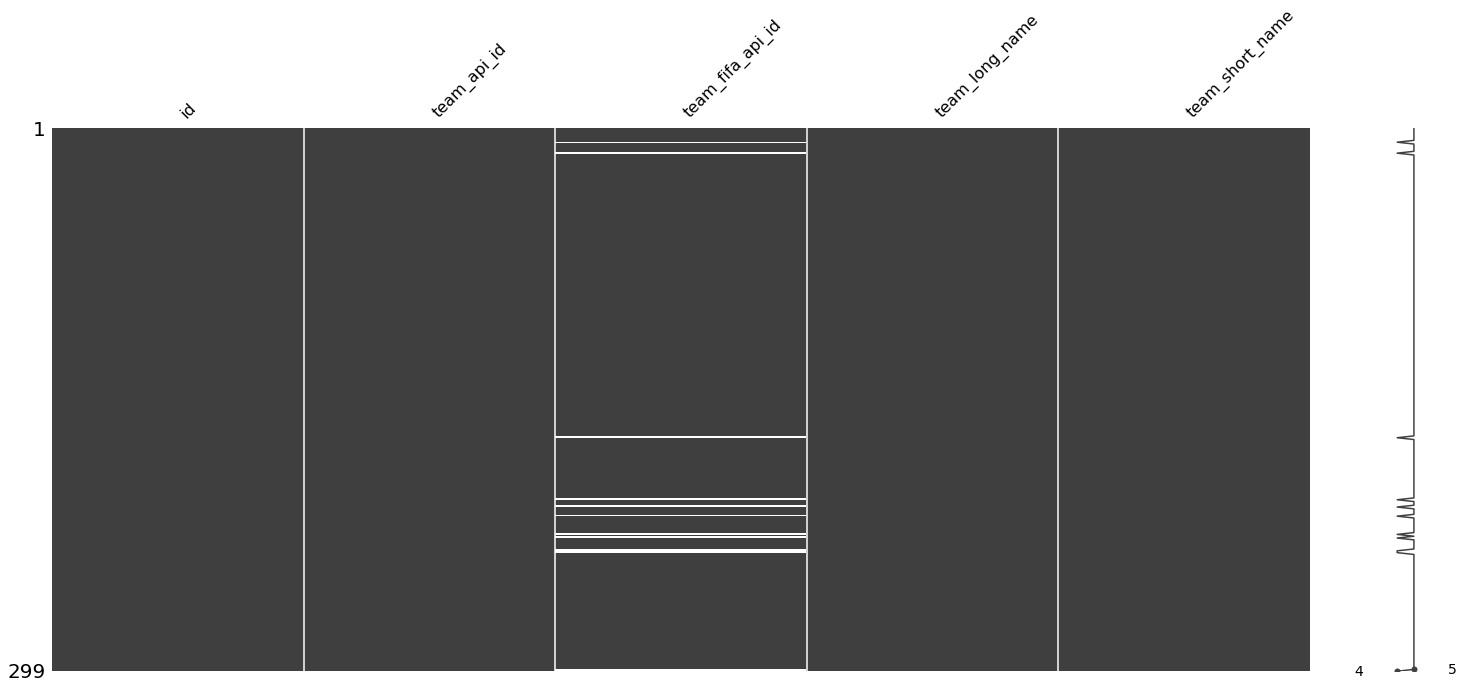

In [539]:
msno.matrix(team)

Only missing values are in the team_fifa_api_id column. This column is the exact same of team_api_id column. We will ignore this.

In [540]:
team_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

<AxesSubplot:>

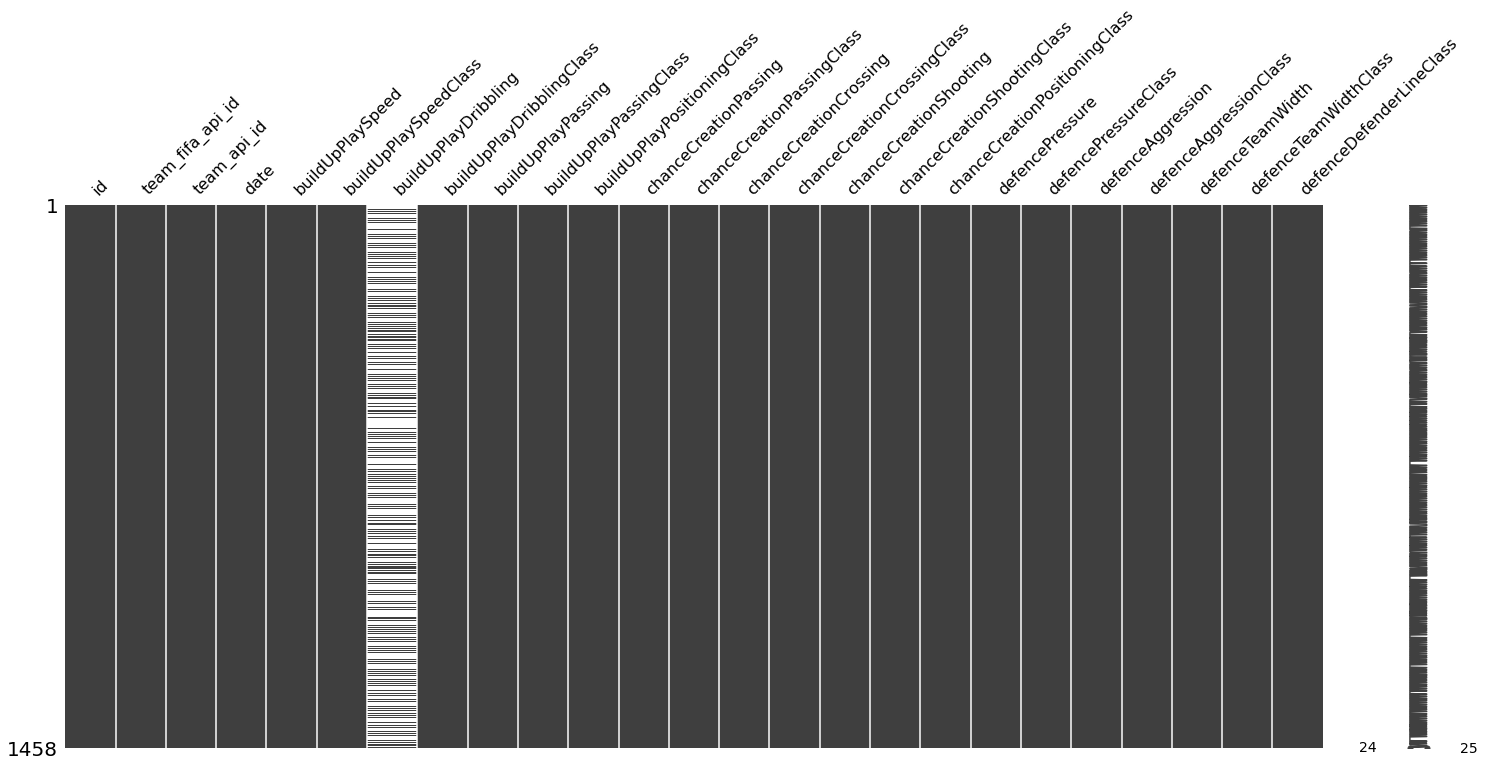

In [541]:
msno.matrix(team_info)

Only one column has missing values in this table. Unfortunately, the missing values are the majority here. We will have to drop this column.

In [542]:
team_info = team_info.drop(['buildUpPlayDribbling'], axis=1)

### Outliers

In [543]:
def outlier_plot(v, h, data, size=(20,20), start=0):
    fig, ax = plt.subplots(v, h, figsize=size)
    col_num = start
    if v == 1:
        for i in range(h):
            sns.boxplot(y=data.select_dtypes(include='number').iloc[:, col_num], data=data, ax=ax[i])
            col_num+=1
    elif h == 1:
        for i in range(v):
            sns.boxplot(y=data.select_dtypes(include='number').iloc[:, col_num], data=data, ax=ax[i])
            col_num+=1
    else:
        for i in range(len(ax)):
          for j in range(len(ax[i])):
            sns.boxplot(y=data.select_dtypes(include='number').iloc[:, col_num], data=data, ax=ax[i, j])
            col_num+=1
    # Set the title
    plt.suptitle('Distribution of Features', fontsize=30)
    plt.show()

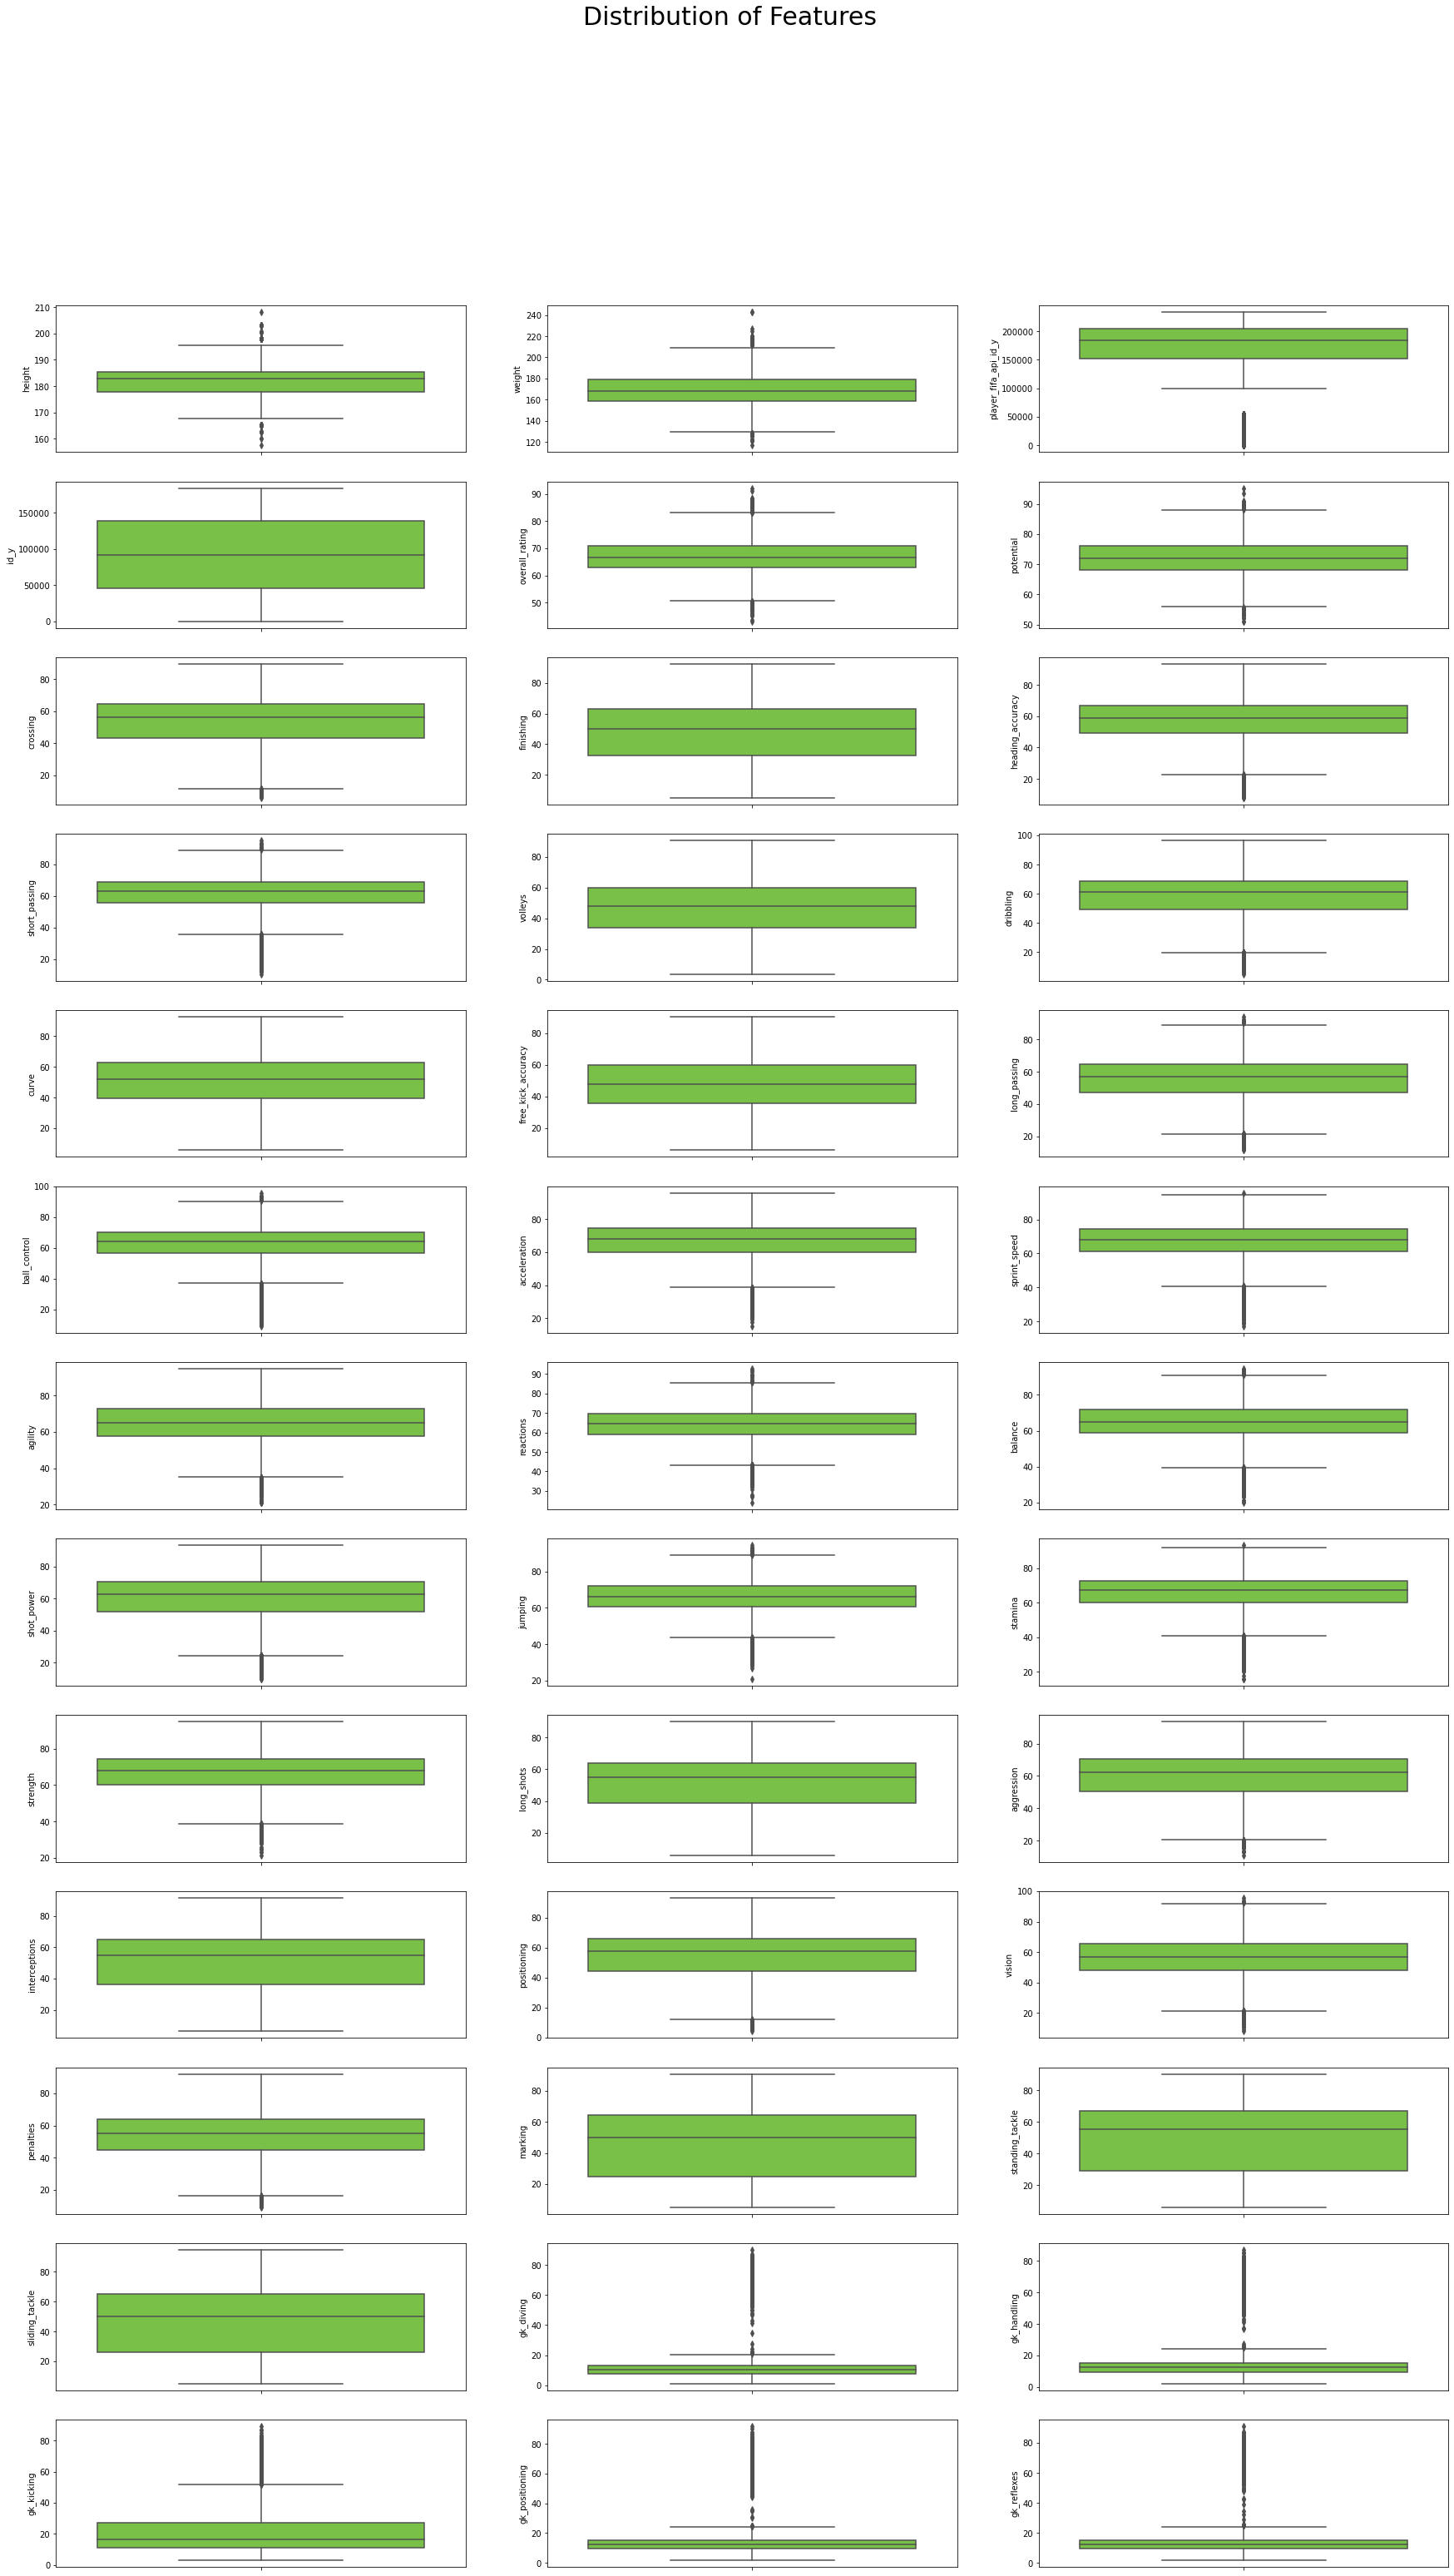

In [544]:
outlier_plot(13, 3, player, size=(30, 50), start=3)

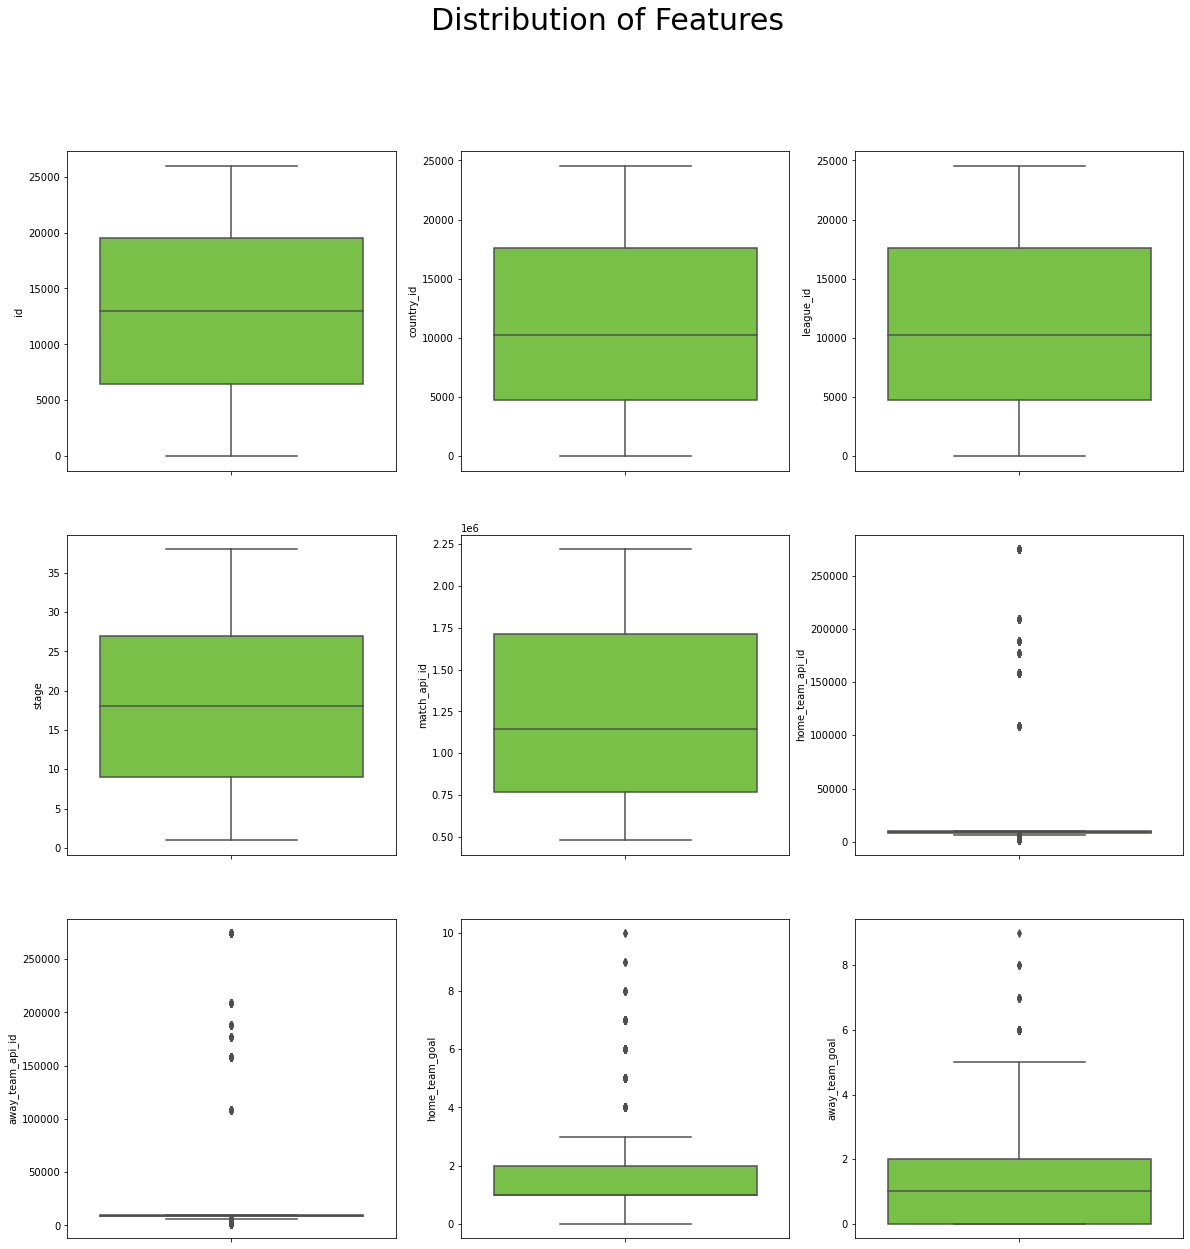

In [545]:
outlier_plot(3,3, match)

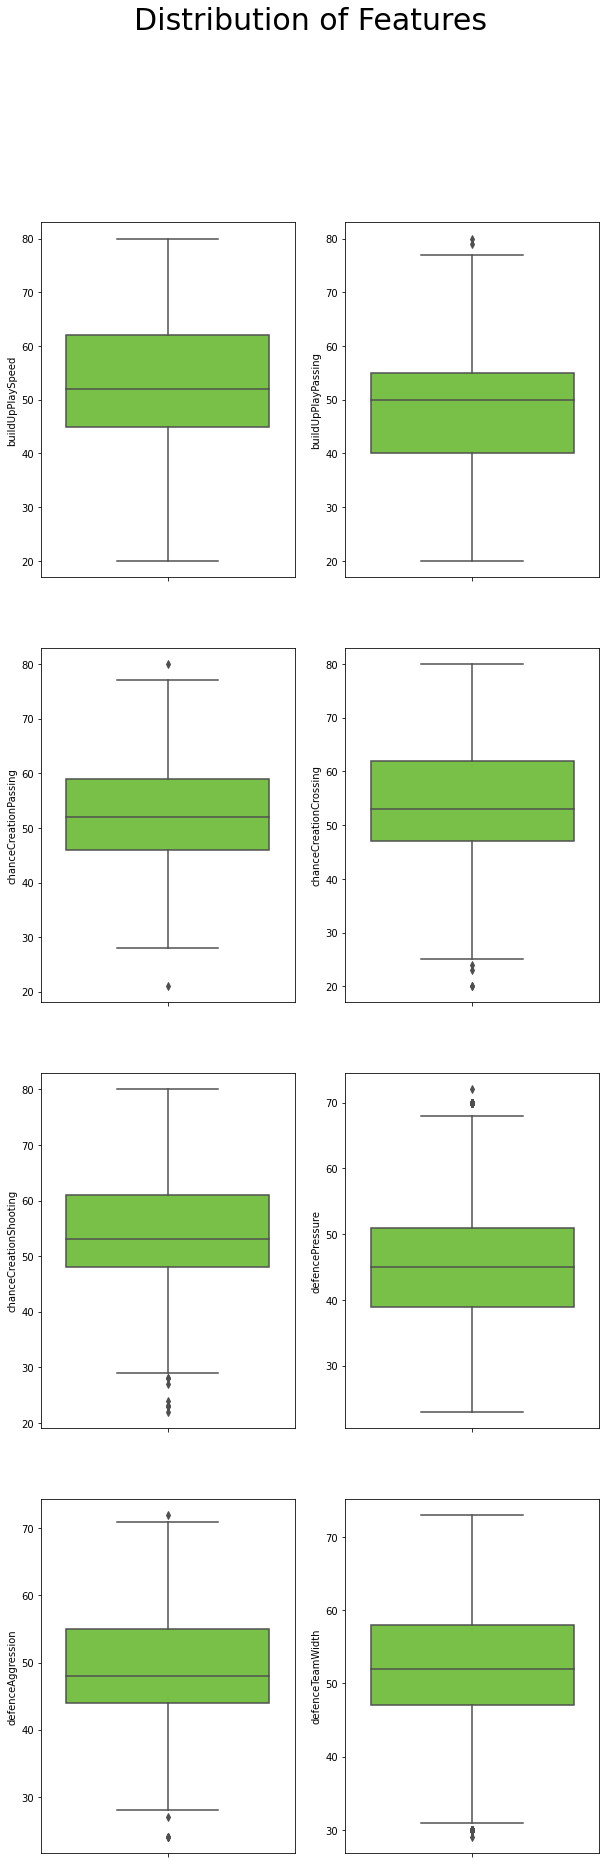

In [547]:
outlier_plot(4, 2, team_info, size=(10,30), start=3)

None of the distributions in this dataset have extreme values. All values are in expected ranges.

### Merge Data

In [548]:
team = team.merge(match[['country_id', 'home_team_api_id']],
                  how='left', left_on='team_api_id',
                  right_on='home_team_api_id').drop_duplicates()

In [549]:
team = team.merge(league, how='left',on='country_id')

### Feature Extraction

In [550]:
def identify_winner(data):
    if data['home_team_goal'] > data['away_team_goal']:
        return 'home'
    elif data['away_team_goal'] > data['home_team_goal']:
        return 'away'
    else:
        return 'draw'

In [551]:
match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3
...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22,1992091,10190,10191,1,0
25975,25976,24558,24558,2015/2016,9,2015-09-23,1992092,9824,10199,1,2
25976,25977,24558,24558,2015/2016,9,2015-09-23,1992093,9956,10179,2,0
25977,25978,24558,24558,2015/2016,9,2015-09-22,1992094,7896,10243,0,0


In [552]:
match['result'] = match.apply(identify_winner, axis=1)

## Leagues and Teams

Each season many countries in Europe held their own football leagues. Some countries have different divisions of leagues. These divisions range from highly professional ones to amateur leagues. Highest divisions are participated only by the most successful teams of the country. In this dataset, the data we have is limited to the highest division of each country's leagues. Let's take a look at the countries and leagues we will analyze.

### Countries

In [553]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
europe=world[world.continent=='Europe']
europe=europe[europe.name!='Russia']
polygon = Polygon([(-25,35), (40,35), (40,75),(-25,75)])
poly_gdf = geopandas.GeoDataFrame([1], geometry=[polygon], crs=world.crs)
europe=geopandas.clip(europe, polygon)

In [554]:
uk = (league['country'] == 'England') | (league['country'] == 'Scotland')
league_alt = league.copy()
league_alt.loc[uk, 'country'] = 'United Kingdom'

In [555]:
league_countries = europe[europe.name.isin(list(league_alt['country']))]
league_countries = league_countries.merge(league_alt, how='left', left_on='name', right_on='country')

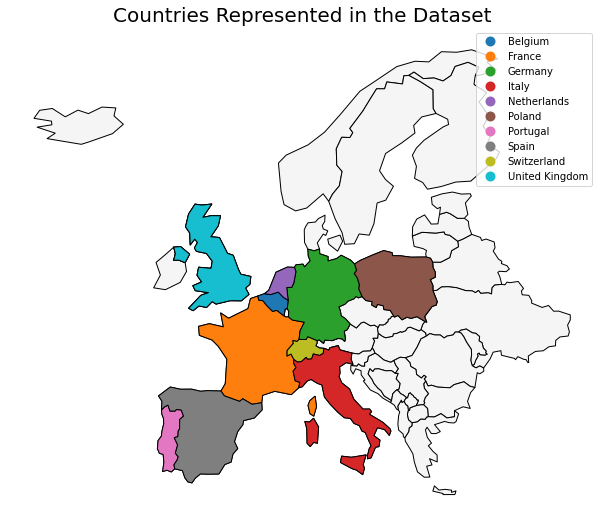

In [556]:
fig, ax = plt.subplots(figsize=(25, 9))
europe.plot(color='whitesmoke',edgecolor='black', ax=ax)
league_countries.plot(column='country', edgecolor='black', ax=ax, legend=True)
plt.title('Countries Represented in the Dataset', fontsize=20)
ax.axis('off')
plt.show()

In [642]:
league_countries['country'].to_csv('countries.csv')

Our dataset includes some of the largest countries in Europe. As mentioned before, some of these countries have multiple leagues. In our analysis we will look at only the highest divisions of these leagues, regarding to the data availablity.

We know that some these countries are larger than others. But does that mean that they have larger leagues and more teams? We want to know whether some countries have a larger presence in the dataset.

In [557]:
positions = ['top', 'right', 'left']
# Function to turn off spines
def turn_spines_off(ax, positions=positions):
  for i in positions:
    ax.spines[i].set_visible(False)

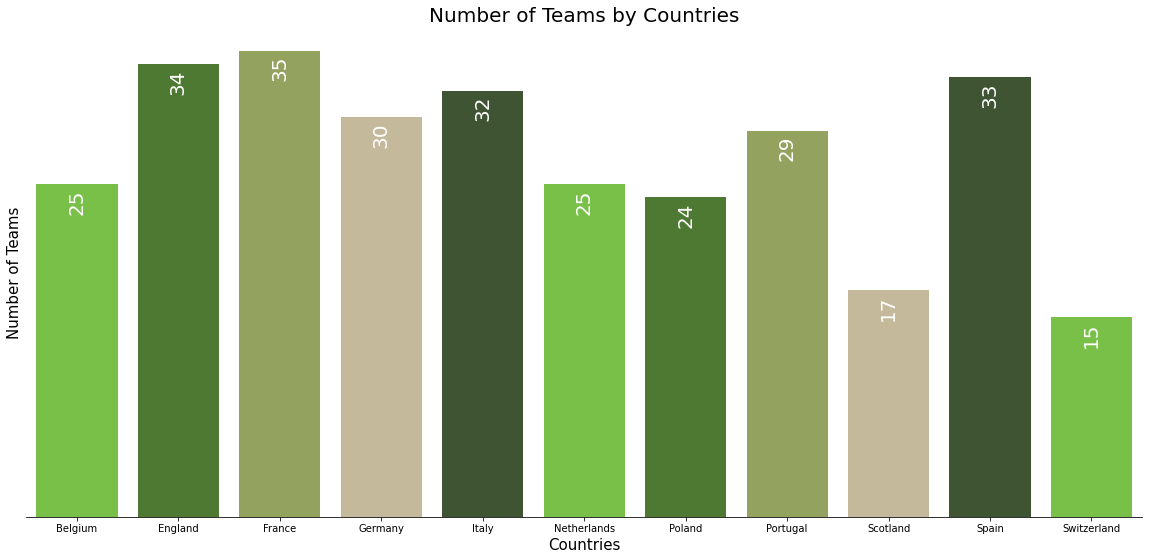

In [558]:
fig, ax = plt.subplots(figsize=(20, 9))
sns.countplot(x='country', data=team, ax=ax, palette=soccer_colors)
ax.bar_label(ax.containers[0], rotation=90,
             padding=-30, color='white', fontsize=20)
plt.xlabel('Countries', fontsize=15)
plt.ylabel('Number of Teams', fontsize=15)
plt.title('Number of Teams by Countries', fontsize=20)
ax.set_yticks([])
turn_spines_off(ax)
plt.show()

While larger countries seem to have relatively larger leagues in terms of number of teams participating, this not a general rule. We can see that Germany, the largest country in Europe, has less teams in its premier league compared to other countries with less population, such as England, France, Italy and Spain. And overall, each country seem to have close numbers of teams in their premier leagues. 

## Teams

Let's now look at the actual teams playing in these European leagues. We want to learn the performance of different teams to identify which teams are the top teams in their respective countries. After that we will try to find out the characteristics of those top teams. We will see whether they are similar to their peers in different countries. 

### Top Teams

In order to determine the top teams, we need to find out which teams have most win ratios at home and away.

In [559]:
match_results = pd.get_dummies(match, columns=['result'])

In [560]:
home_results = match_results.groupby(['home_team_api_id'])[['result_away',
                                                            'result_draw',
                                                            'result_home']].agg(['mean', 'sum'])
home_results.columns = home_results.columns.to_flat_index()

home_results.columns = ['home_lose_mean', 'home_lose_sum', 'home_draw_mean',
                        'home_draw_sum', 'home_win_mean', 'home_win_sum']

home_results['total_home'] = home_results['home_lose_sum'] + home_results['home_draw_sum'] + home_results['home_win_sum']

home_results = home_results.reset_index()

In [561]:
away_results = match_results.groupby(['away_team_api_id'])[['result_away',
                                                            'result_draw',
                                                            'result_home']].agg(['mean', 'sum'])
away_results.columns = away_results.columns.to_flat_index()

away_results.columns = ['away_win_mean', 'away_win_sum', 'away_draw_mean',
                        'away_draw_sum', 'away_lost_mean', 'away_lose_sum']

away_results['total_away'] = away_results['away_win_sum'] + away_results['away_draw_sum'] + away_results['away_lose_sum']

away_results = away_results.reset_index()

In [562]:
home_away = home_results.merge(away_results, how='left', left_on='home_team_api_id', right_on='away_team_api_id')

In [563]:
home_away['team_api_id'] = home_away['home_team_api_id']

In [564]:
home_away = home_away.merge(team, how='left', on='team_api_id')

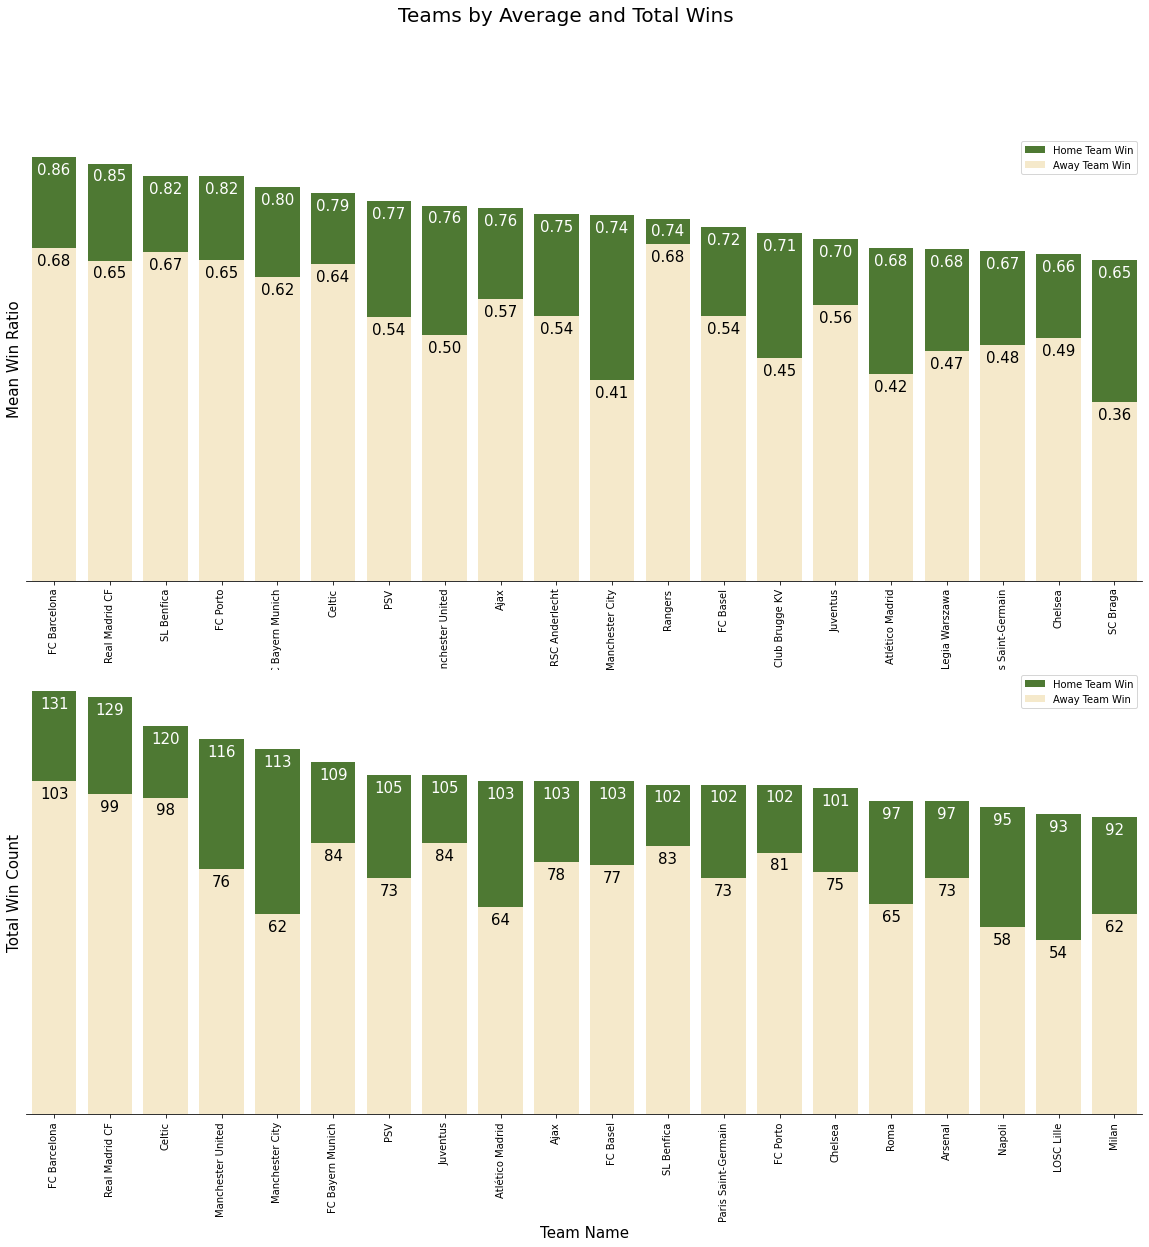

In [565]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 18))
sns.barplot(x='team_long_name', y='home_win_mean',
            data=home_away.sort_values('home_win_mean', ascending=False).head(20),
            ax=ax1, color='#4c8527', label='Home Team Win')
sns.barplot(x='team_long_name', y='away_win_mean',
            data=home_away.sort_values('home_win_mean', ascending=False).head(20),
            ax=ax1, alpha=1, color='#fcecc4',label='Away Team Win')
ax1.bar_label(ax1.containers[0], fmt='%.2f', padding=-20, color='white', fontsize=15)
ax1.bar_label(ax1.containers[1], fmt='%.2f', padding=-20, fontsize=15)
ax1.set_ylabel('Mean Win Ratio', fontsize=15)
ax1.set_xlabel('Team Name')
turn_spines_off(ax1)
ax1.set_yticks([])
ax1.tick_params(axis='x', labelrotation = 90)
ax1.legend()

sns.barplot(x='team_long_name', y='home_win_sum',
            data=home_away.sort_values('home_win_sum', ascending=False).head(20),
            ax=ax2, color='#4c8527', label='Home Team Win')
sns.barplot(x='team_long_name', y='away_win_sum',
            data=home_away.sort_values('home_win_sum', ascending=False).head(20),
            ax=ax2, alpha=1, color='#fcecc4',label='Away Team Win')
ax2.bar_label(ax2.containers[0],  padding=-20, color='white', fontsize=15)
ax2.bar_label(ax2.containers[1], padding=-20, fontsize=15)
ax2.set_ylabel('Total Win Count', fontsize=15)
ax2.set_xlabel('Team Name', fontsize=15)
turn_spines_off(ax2)
ax2.set_yticks([])
ax2.tick_params(axis='x', labelrotation = 90)
ax2.legend()
plt.suptitle('Teams by Average and Total Wins', fontsize=20)

plt.show()

All teams that had the best win ratios and win numbers are performing better at their home stadium. FC Barcelona and Real Madrid have both the best win ratios and win count. Overall, the two graphs seem similar in terms of the teams represented. This means that some teams that have large number of wins also have high win ratios, which makes sense. 

Except for a couple of teams, the difference between home and away wins are not very dramatic. For example, FC Barcelona has 0.86 win ratio at home, and 0.68 away. The latter is not a bad average value, which shows how successful this team is. Most other teams follow the same same pattern, away goal ratios follow those of home win ratios. One exception is that Manchester City has a much better home win ratio at 0.74, compared to away win ratio of 0.41. This stands out when compared to its peers. On the other hand Rangers seem to have the smallest gap in home vs. away win ratios. Overall, it looks like teams that are successful at home are often also successful playing as a guest.

Let's see if these two values actually follow each other.

In [566]:
home_away_melt = home_away.melt()
mask = (home_away_melt['variable'] == 'home_win_mean') | (home_away_melt['variable'] == 'away_win_mean')
home_away_mean_melt = home_away_melt[mask]

In [567]:
mask = (home_away_melt['variable'] == 'home_win_sum') | (home_away_melt['variable'] == 'away_win_sum')
home_away_win_melt = home_away_melt[mask]

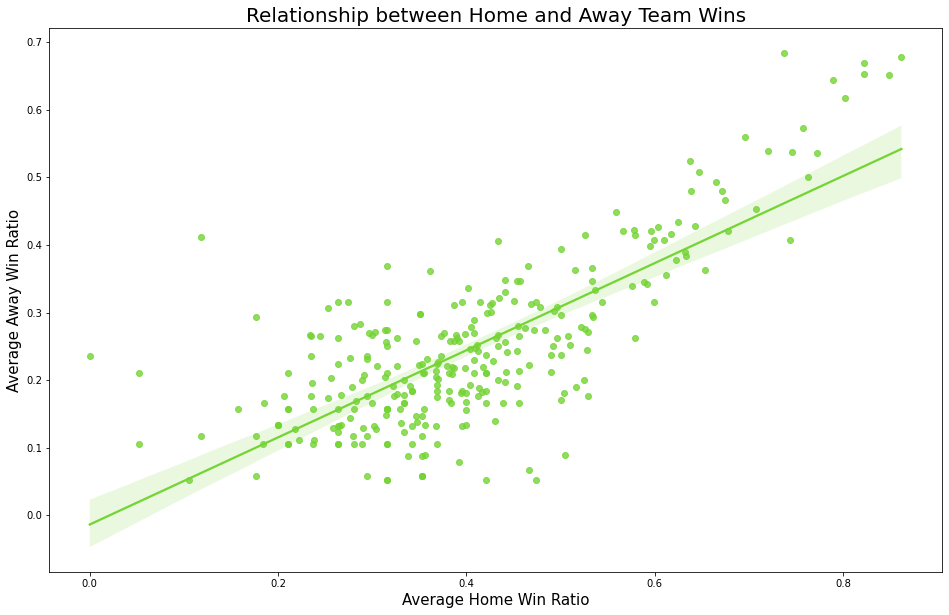

In [568]:
fig, ax = plt.subplots(figsize=(16, 10))
sns.regplot(x='home_win_mean', y='away_win_mean', data=home_away)
plt.xlabel('Average Home Win Ratio', fontsize=15)
plt.ylabel('Average Away Win Ratio', fontsize=15)
plt.title('Relationship between Home and Away Team Wins', fontsize=20)
plt.show()

In [569]:
corr = home_away['home_win_mean'].corr(home_away['away_win_mean'])
print(f"Correlation between average home wins and average away wins is: {corr}")

Correlation between average home wins and average away wins is: 0.7656278606023464


This graph shows that, success rates at home vs. away largely follow each other. This means that in general the success of a team does not differ dramatically in different settings. However, we have seen that for the top teams, while away wins followed the home wins, they were still behind. We will now see how these two values look like every team in this dataset.

We can also see here that most teams are cluttered around values lower than 0.4 for both home win and away win. This means that the high values we have seen for the top teams are not present for other teams. However, for these teams too, the values of home and away win ratios follow each other. 

We will now look at the difference of home and away win ratios, and conduct a hypothesis test to see if the difference is statistically significant.

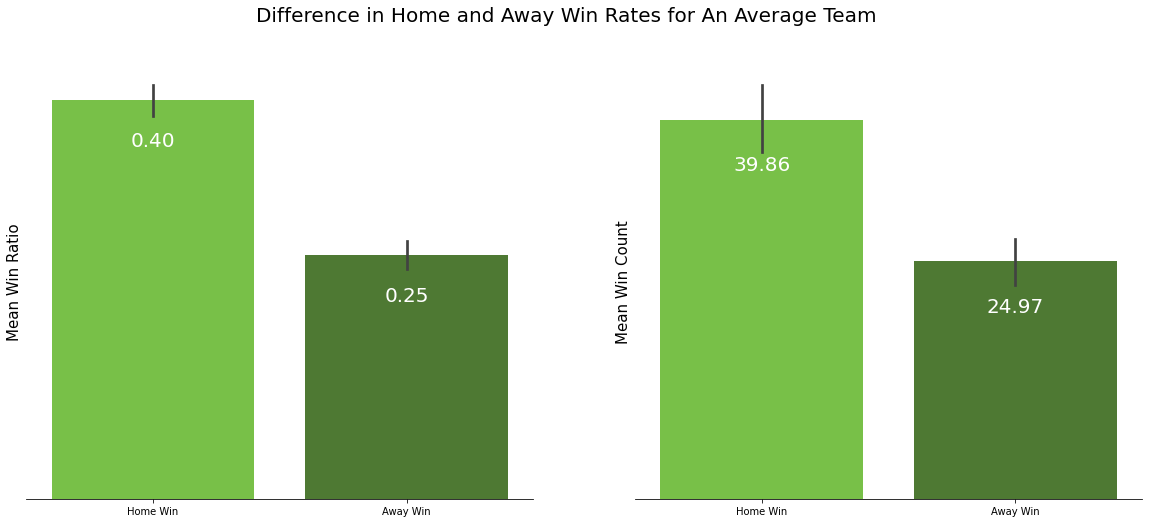

In [570]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot(x='variable', y='value', data=home_away_mean_melt, ax=ax1)
sns.barplot(x='variable', y='value', data=home_away_win_melt, ax=ax2)
ax1.bar_label(ax1.containers[0], fmt='%.2f', color='white', padding=-50, fontsize=20)
ax2.bar_label(ax2.containers[0], fmt='%.2f',color='white', padding=-55, fontsize=20)
ax1.set_ylabel('Mean Win Ratio', fontsize=15)
ax2.set_ylabel('Mean Win Count', fontsize=15)
ax1.set_xlabel('')
ax2.set_xlabel('')
turn_spines_off(ax1)
turn_spines_off(ax2)
ax1.set_xticks([0, 1],labels=['Home Win', 'Away Win'])
ax2.set_xticks([0, 1],labels=['Home Win', 'Away Win'])
ax1.set_yticks([])
ax2.set_yticks([])
plt.suptitle('Difference in Home and Away Win Rates for An Average Team', fontsize=20)
plt.show()

Here we see clearly that when a team plays at its home stadium, it has more chance at winning. In the first graph we see the average win ratios of teams in different settings. Teams playing at home have around 0.4 chance at winning on average. This is almost the double of the chance of winning as a guest. 

On the second graph, we see the average number of wins in different settings. Playing at home results in an average of 40 wins, while as a guest teams averaged 25 wins. 

In both metrics, the differences seem concrete. However, as they have some error, we want to make hypothesis tests to make sure of this fact. 

Considering all match results in the dataset, do matches played in home stadium have a significantly higher mean win ratio than those played as a guest team?

**Population**: All match results

**Significance Level**: 0.05

**Parameter of Interest**: $\mu_1 - \mu_2$,  Difference of win ratios at home and away

**Null Hypothesis**: $\mu_1 = \mu_2$

**Alternative Hypothesis**: $\mu_1 > \mu_2$

In [571]:
test_stat, p_value = statsmodels.stats.weightstats.ztest(home_away['home_win_mean'],
                                                         home_away['away_win_mean'],
                                                         alternative='larger')
print(f"Test statistic: {test_stat}\n\
p-value: {p_value}")

Test statistic: 14.126989198099167
p-value: 1.2949112983213457e-45


With this very low p-value, we will reject the null hypothesis, which states that there is no difference between average home win ratios and average away win ratios. We can see that there is enough evidence to say that teams playing at home have a much higher chance of winning.

Let's do the same again with number of wins to see if a team has a higher chance of scoring higher number of wins at home.

Considering all match results in the dataset, does a team have more wins on average at home than away?

**Population**: All match results

**Significance Level**: 0.05

**Parameter of Interest**: $\mu_1 - \mu_2$,  Difference of win count at home and away

**Null Hypothesis**: $\mu_1 = \mu_2$

**Alternative Hypothesis**: $\mu_1 > \mu_2$

In [572]:
test_stat, p_value = statsmodels.stats.weightstats.ztest(home_away['home_win_sum'],
                                                         home_away['away_win_sum'],
                                                         alternative='larger')
print(f"Test statistic: {test_stat}\n\
p-value: {p_value}")

Test statistic: 6.847020880648412
p-value: 3.770185785200271e-12


Again we see that, the low p-value confirms that our assumption was true. The difference between home and away wins is statistically significant. Teams have much higher win numbers at home.

Now let's take a look at some individual leagues to see if the patterns we have seen so far are present. We will investigate Spain and England.

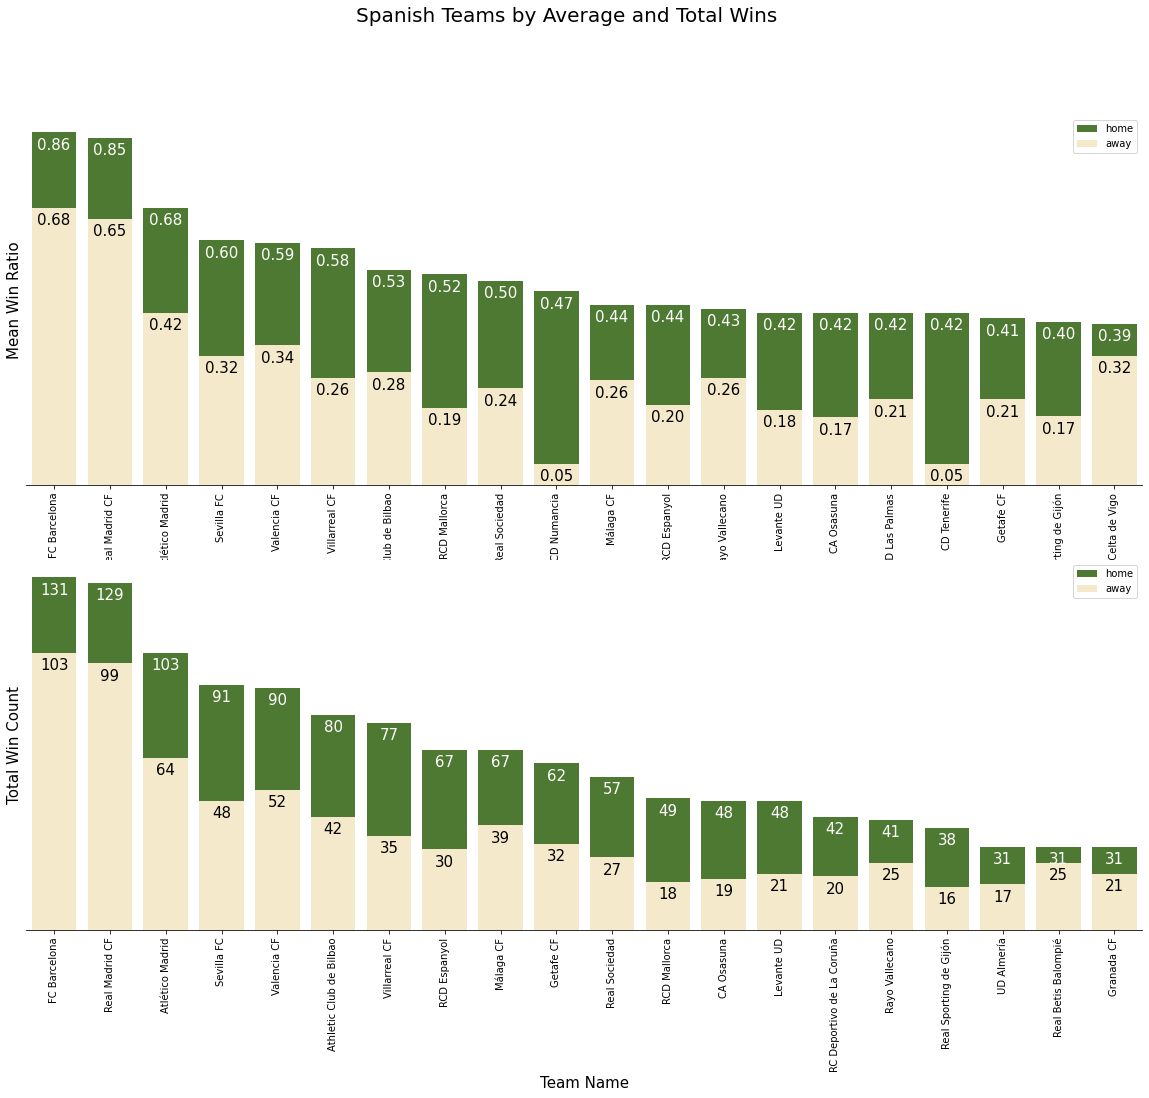

In [573]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 15))
spain = home_away[home_away['country'] == 'Spain']
sns.barplot(x='team_long_name', y='home_win_mean', data=spain.sort_values('home_win_mean', ascending=False).head(20), ax=ax1, color='#4c8527', label='home')
sns.barplot(x='team_long_name', y='away_win_mean', data=spain.sort_values('home_win_mean', ascending=False).head(20), ax=ax1, alpha=1, color='#fcecc4',label='away')
ax1.bar_label(ax1.containers[0], fmt='%.2f', padding=-20, color='white', fontsize=15)
ax1.bar_label(ax1.containers[1], fmt='%.2f', padding=-20, fontsize=15)
ax1.set_ylabel('Mean Win Ratio', fontsize=15)
ax1.set_xlabel('Team Name')
turn_spines_off(ax1)
ax1.set_yticks([])
ax1.tick_params(axis='x', labelrotation = 90)
ax1.legend()

sns.barplot(x='team_long_name', y='home_win_sum', data=spain.sort_values('home_win_sum', ascending=False).head(20), ax=ax2, color='#4c8527', label='home')
sns.barplot(x='team_long_name', y='away_win_sum', data=spain.sort_values('home_win_sum', ascending=False).head(20), ax=ax2, alpha=1, color='#fcecc4',label='away')
ax2.bar_label(ax2.containers[0],  padding=-20, color='white', fontsize=15)
ax2.bar_label(ax2.containers[1], padding=-20, fontsize=15)
ax2.set_ylabel('Total Win Count', fontsize=15)
ax2.set_xlabel('Team Name', fontsize=15)
turn_spines_off(ax2)
ax2.set_yticks([])
ax2.tick_params(axis='x', labelrotation = 90)
ax2.legend()
plt.suptitle('Spanish Teams by Average and Total Wins', fontsize=20)

plt.legend()
plt.show()

Spain has some of the most successful teams in Europe. In fact the top 2 teams of Spain are the top 2 teams we have seen in the graph representing all countries in our dataset. However, here we see something interesting. These two top teams, FC Barcelona and Real Madrid seem to dominate this league. There seems to be a significant difference in terms of success when they are compared to the rest of the league. Let's see if we can find something similiar in England.

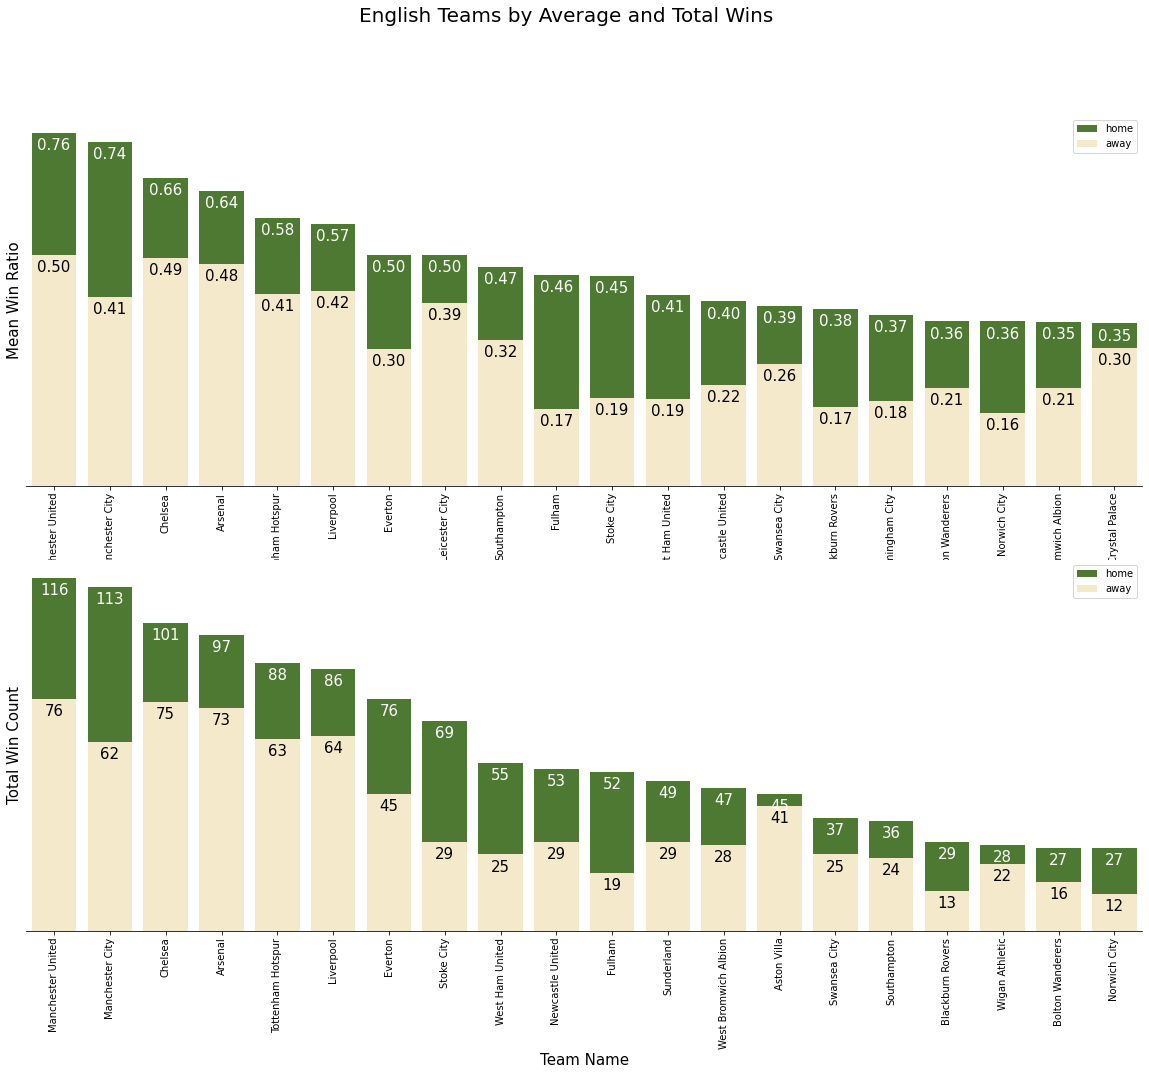

In [574]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 15))
england = home_away[home_away['country'] == 'England']
sns.barplot(x='team_long_name', y='home_win_mean', data=england.sort_values('home_win_mean', ascending=False).head(20), ax=ax1, color='#4c8527', label='home')
sns.barplot(x='team_long_name', y='away_win_mean', data=england.sort_values('home_win_mean', ascending=False).head(20), ax=ax1, alpha=1, color='#fcecc4',label='away')
ax1.bar_label(ax1.containers[0], fmt='%.2f', padding=-20, color='white', fontsize=15)
ax1.bar_label(ax1.containers[1], fmt='%.2f', padding=-20, fontsize=15)
ax1.set_ylabel('Mean Win Ratio', fontsize=15)
ax1.set_xlabel('Team Name')
turn_spines_off(ax1)
ax1.set_yticks([])
ax1.tick_params(axis='x', labelrotation = 90)
ax1.legend()

sns.barplot(x='team_long_name', y='home_win_sum', data=england.sort_values('home_win_sum', ascending=False).head(20), ax=ax2, color='#4c8527', label='home')
sns.barplot(x='team_long_name', y='away_win_sum', data=england.sort_values('home_win_sum', ascending=False).head(20), ax=ax2, alpha=1, color='#fcecc4',label='away')
ax2.bar_label(ax2.containers[0],  padding=-20, color='white', fontsize=15)
ax2.bar_label(ax2.containers[1], padding=-20, fontsize=15)
ax2.set_ylabel('Total Win Count', fontsize=15)
ax2.set_xlabel('Team Name', fontsize=15)
turn_spines_off(ax2)
ax2.set_yticks([])
ax2.tick_params(axis='x', labelrotation = 90)
ax2.legend()
plt.suptitle('English Teams by Average and Total Wins', fontsize=20)
plt.legend()
plt.show()

We again see in England that some teams have much higher win rates than others. Here the teams dominating are, Manchester United and Manchester City. There seems to be a divide between most successful teams and others. Let's go back to the general dataset and investigate the characteristics of teams to understand this divide.

### Top Team Characteristics

In [575]:
team_info_num = team_info.groupby(['team_api_id', 'team_fifa_api_id']).mean().reset_index()

cat_cols = team_info.select_dtypes(include=['object']).drop('date', axis=1).columns

cat_cols = np.append(cat_cols, ['team_fifa_api_id', 'team_api_id'])

team_info_cat = team_info[cat_cols].groupby(['team_api_id']).agg(lambda x: pd.Series.mode(x)[0]).reset_index()

In [576]:
team_info_grouped = team_info_cat.merge(team_info_num, how='left', on='team_api_id')
team_info_grouped = team_info_grouped.merge(team, how='inner', on='team_api_id')

In [577]:
def map_team_class(value):
    top_team_names = list(home_away.sort_values('home_win_mean', ascending=False).head(20)['team_long_name'])
    if value in '|'.join(top_team_names):
        return 'Top'
    else:
        return 'Other'

In [578]:
team_info_grouped['class'] = team_info_grouped['team_long_name'].map(map_team_class)

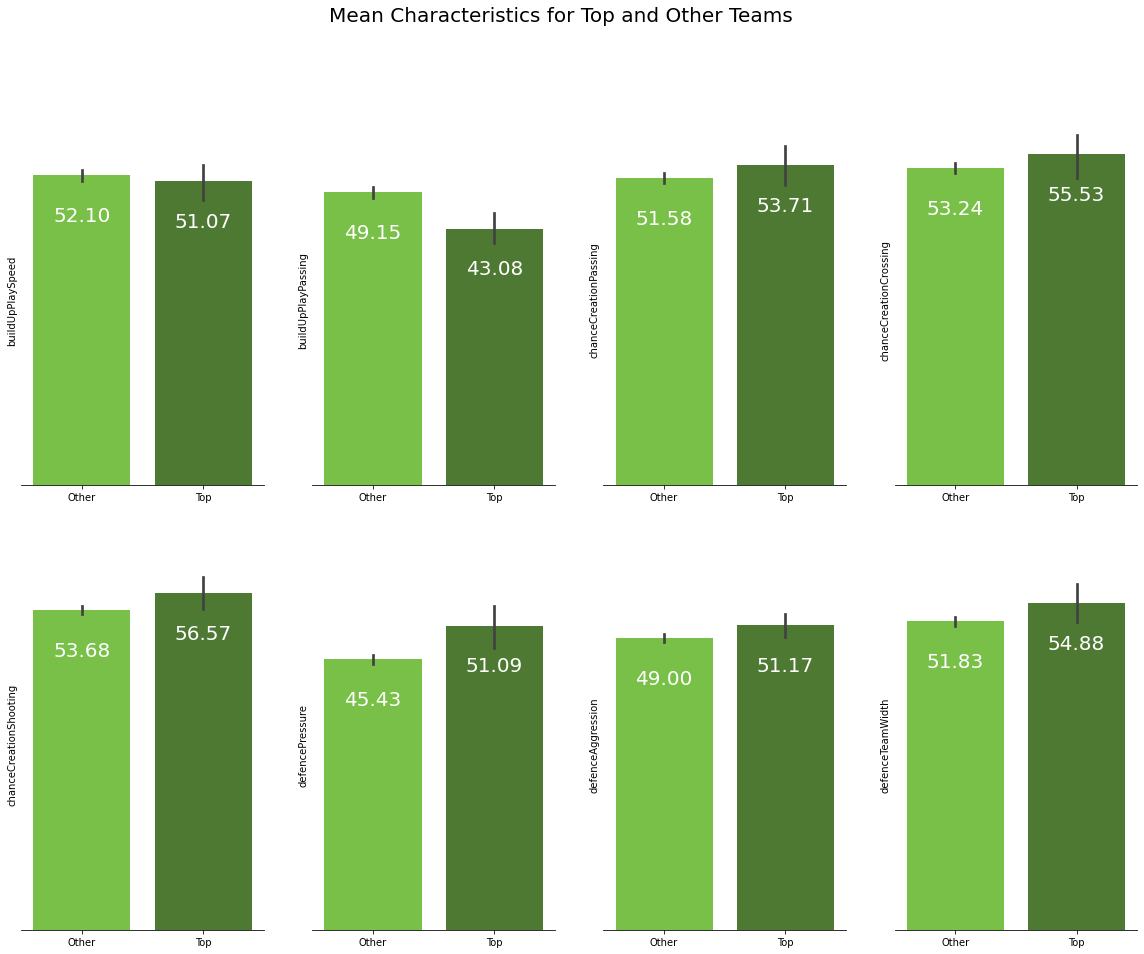

In [579]:
fig, ax = plt.subplots(2, 4, figsize=(20,15), sharey=True)
col_num = 4
for i in range(len(ax)):
    for j in range(len(ax[i])):
        sns.barplot(x='class', y=team_info_grouped.select_dtypes(include='number').iloc[:, col_num],
                    data=team_info_grouped, ax=ax[i, j])
        col_num+=1
        ax[i,j].bar_label(ax[i,j].containers[0], fmt='%.2f', padding=-50, fontsize=20, color='white')
        ax[i,j].set_xlabel('')
        ax[i,j].set_xlabel('')
        turn_spines_off(ax[i,j])
        ax[i, j].set_yticks([])
plt.suptitle('Mean Characteristics for Top and Other Teams', fontsize=20)
plt.show()

Here the teams are separated as Top and Other teams. Top represents the 20 most successful teams in terms of average win ratio in our dataset. We will try to understand the differences of these teams to less successful teams. 

In the graphs we see the numerical differences. When we compare these values, even though we see differences in mean values, the confidence intervals largely overlap each other, so we cannot simply say that they are different. However, there are two columns these two types of teams are different enough to mention. 

Firstly, we see a difference in build up play passing. Build up refers to the phase when a team has the possesion of the ball. Passing is used to keep the ball at the team. It simply refers to the maneuvers to swap the ball between players of the same team. It looks like top teams tend to use this tactic less often than other teams.

Secondly, we see a larger difference in defence pressure. This refers to the strength of a team in terms of defending their gate agains the opponent team. Top teams have much larger values in this sense. This could be interpreted as that top teams give a bit more importance to defence. Perhaps, by keeping other team from scoring they improve their chance of winning.

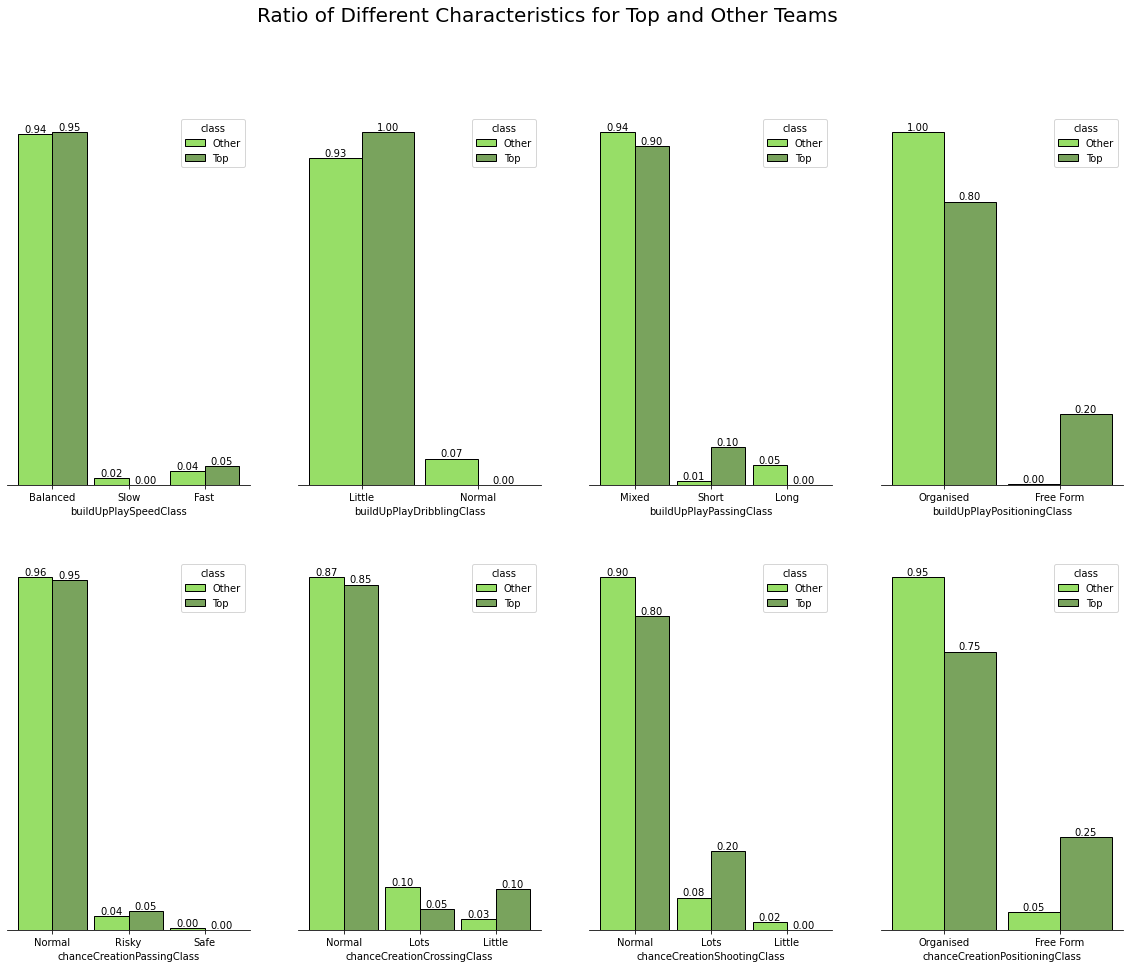

In [580]:
fig, ax = plt.subplots(2, 4, figsize=(20,15))
col_num = 0
for i in range(len(ax)):
    for j in range(len(ax[i])):
        sns.histplot(x=team_info_grouped.select_dtypes(include='object').iloc[:, col_num].name,
                    data=team_info_grouped, ax=ax[i, j], hue='class',  multiple="dodge", 
                  stat='density', shrink=0.9, common_norm=False)
        col_num+=1
        for k in range(len(ax[i, j].containers)):
            ax[i,j].bar_label(ax[i,j].containers[k], fmt='%.2f', padding=0, fontsize=10)
        ax[i,j].set_ylabel('')
        turn_spines_off(ax[i,j])
        ax[i, j].set_yticks([])
        
plt.suptitle('Ratio of Different Characteristics for Top and Other Teams', fontsize=20)
plt.show()

We will now check the categorical values to understand the difference between top and other teams. 

Mostly the two types of teams follow concentrated in a majority category in all columns. And most of the time they seem to have similar share. When we look at the minority categories, the differences between top and other teams seem more appearent. Let's focus on these now.

Dribbling is the maneuver conducted by the player who has the possesion of the ball, in order to avoid other players to catch the ball. Both teams seem to have similar results in little dribbling. Little here means that the ball is bouncing less and largely touches the floor. This seems to be tactic used by both type of teams. However, this is used more often by the top teams than others. It looks like keeping the ball on the ball may be effective and could be one of the driving factor of the top teams' success. 

In the next graph, we see that while all teams use mixed passing mostly, top teams tend to use short passings rather than long passings. That means that top teams usually prefers to pass the ball to a near player rather than a player standing far. Perhaps, top teams do this to play safe.

In build up positioning, we see larger differences between top and other teams. While both type of teams mostly use organised positioning, top teams tend to use free form more often than other teams. It looks like, top teams gives their players a bit larger range of maneuver freedom. This may suggest that they may have more confidence in their players' skills. 

We see the same pattern in chance creation positioning. Here we need to explain chance creation. This refers to the phase where the team is about to shoot the ball to score. In this case, we see that both types of teams depends relatively less on organized positioning and gives a bit more freedom to their players. We should note that they are still mostly organized but the chance of free formations are more present in chance creation phase than build up phase. 

Lastly, in terms of chance creation shooting class, there seem to be a difference in the two types of teams. The categories in this column are not standard in the sport. While we can see the difference, it is hard to interpret them as the dataset does not explain them in detail. However, we will keep this information at hand, as the difference may work in our favor for the prediction model.

## Players

So far, we have seen different team characteristics used by different types of teams. But we should focus on an important factor of the determining of these variables. The different performances we have seen so far are the product of certain team compositions. And at the heart of these compositions, lay individual players. In this section we will try to understand team rosters and how individual players are different from others. 

### Team Rosters

In [581]:
player_stats['team_class'] = player_stats['Team'].map(map_team_class)

In [582]:
top_team_players = player_stats[player_stats['team_class'] == 'Top']

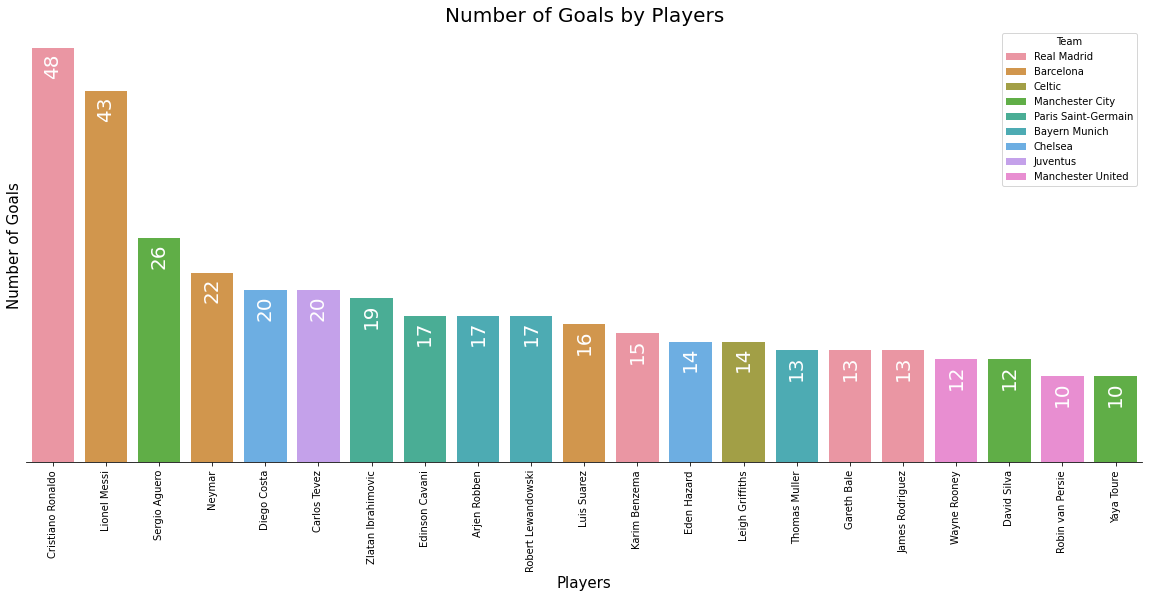

In [583]:
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(x='Player', y='Goals', hue='Team',
            data=top_team_players.sort_values('Goals', ascending=False).head(30),
           dodge=False, ax=ax)
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i], rotation=90,
             padding=-30, color='white', fontsize=20)
plt.xlabel('Players', fontsize=15)
ax.tick_params(axis='x', labelrotation = 90)
plt.ylabel('Number of Goals', fontsize=15)
plt.title('Number of Goals by Players', fontsize=20)
ax.set_yticks([])
turn_spines_off(ax)
plt.show()

In terms of player success, we will focus on the number of goals achieved by each player in our dataset. 

When we look at the graph, we see that some players are dramaticaly more successful than others. Namely, Cristiano Ronaldo with 48 goals, and Lionel Messi with 43 goals. These two star players are followed by Sergio Aguero with 26 goals. The difference between these two top players and the rest show how successful they are. 

However, we should note here that number of goals could be due to different factors. Firstly, some players may retire earlier than others, and their best performance may not have been captured thanks to the time limitation of our dataset. Perhaps some of them were in their peak performance before the start of our data. 

However, on the other hand, we can clearly see that some players are more reliable than others whether it is by their longevity or their extraordinary performances, the number of goals seem to show us a picture of the success of a player.

The players we have looked in this graph are the players from top teams. Would there be a difference if we also included other teams?

In [645]:
player_stats.to_csv('player_stats.csv')

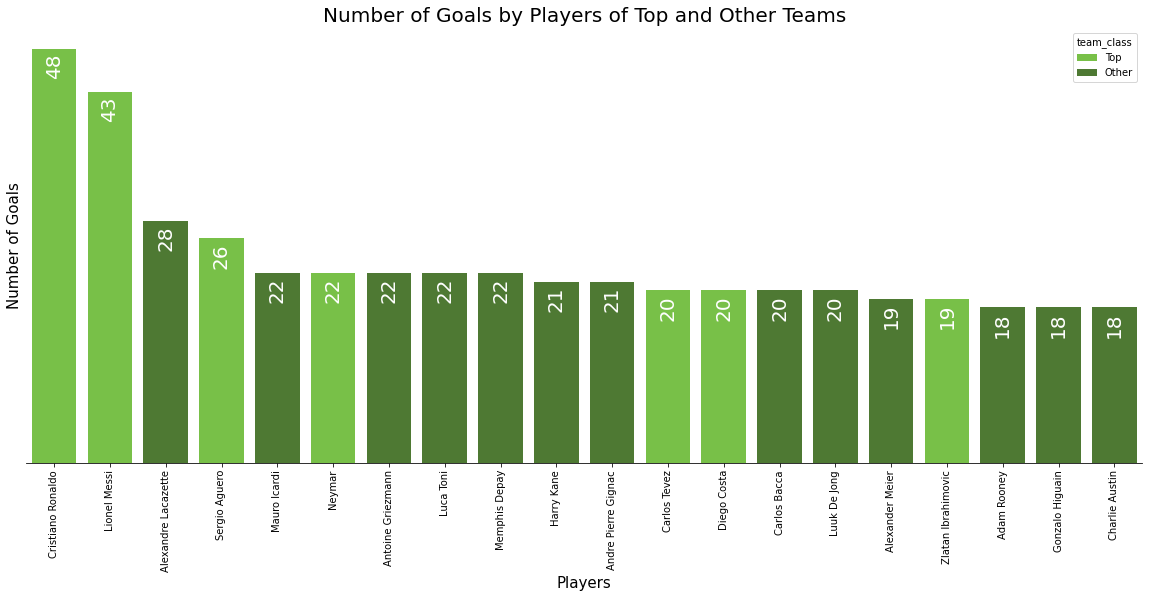

In [584]:
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(y='Goals', x='Player', hue='team_class',
            data=player_stats.sort_values('Goals', ascending=False).dropna(subset='Player')[:20],
           dodge=False)
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i], rotation=90,
             padding=-30, color='white', fontsize=20)
plt.xlabel('Players', fontsize=15)
ax.tick_params(axis='x', labelrotation = 90)
plt.ylabel('Number of Goals', fontsize=15)
plt.title('Number of Goals by Players of Top and Other Teams', fontsize=20)
ax.set_yticks([])
turn_spines_off(ax)
plt.show()

When other teams included, we see new names in the most successful players graph. In fact, most players with high goal numbers seem to be from other teams. It looks like having successful players is not exclusive to the top teams we have identified. But how do players from these two different types of teams score in average? Are they different? 

Before moving on to answer this question, there is something interesting to note here. In top 20, most players have very similar numbers of goals. There are many players with the same numbers and following numbers. This may mean that most of these player shows similar performances. This changes at the very left of our graph, we see the top two players overwhelmingly higher numbers of goals. 

As mentioned before, this could be due to the success of the player, or it could be combined with the longevity of the player. Perhaps some players actually stay in a team or in the career longer than others. 

This brings the question, does team rosters change constantly? This is an important question to answer in our analysis, as we want to predict the future matches. If the team rosters change throughout seasons, we may not have the team composition in the future games, so we may need to exclude player information from our model. 

Let's go back to the first question and answer that. Then we will see how team compositions change.

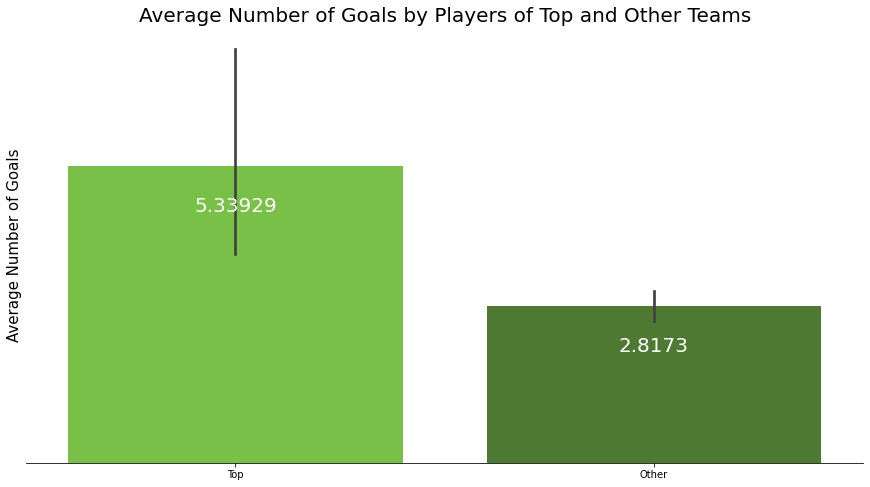

In [585]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(y='Goals', x='team_class', data=player_stats)
ax.bar_label(ax.containers[0],
             padding=-50, color='white', fontsize=20)
plt.xlabel('')
plt.ylabel('Average Number of Goals', fontsize=15)
plt.title('Average Number of Goals by Players of Top and Other Teams', fontsize=20)
ax.set_yticks([])
turn_spines_off(ax)

We see that on average top team players have higher number of goals. However, this comes with a large error bar, which may or may not overlap with the mean number of goals of players from other teams. In order to make sure of the difference, we will conduct a hypothesis test.

Considering all match results in the dataset, does a player from a top team have more goals on average than those playing for other teams?

**Population**: All player goals

**Significance Level**: 0.05

**Parameter of Interest**: $\mu_1 - \mu_2$,  Difference of mean goals of players from top teams and other teams

**Null Hypothesis**: $\mu_1 = \mu_2$

**Alternative Hypothesis**: $\mu_1 > \mu_2$

In [586]:
other_team_players = player_stats[player_stats['team_class'] == 'Other']

In [587]:
# Hypothesis test
test_stat, p_value = statsmodels.stats.weightstats.ztest(top_team_players['Goals'],
                                                         other_team_players['Goals'],
                                                         alternative='larger')
print(f"Test statistic: {test_stat}\n\
p-value: {p_value}")

Test statistic: 4.499660069648526
p-value: 3.403110641145375e-06


The difference is significant. We have a p-value that is almost zero. This gives us enough evidence to reject the null hypothesis that states that players from top teams and other teams have no difference in terms of average goal. Here we can clearly say that top team players score more goals on average than players playing for other teams.

With this question answered, let's go back to our second question. We want to see how team rosters change throughout seasons. We will take some teams from different leagues into account to see a general picture.

In [588]:
team_mask_names = ['Manchester United', 'FC Bayern Munich', 'FC Barcelona', 'Ajax' ,'FC Basel', 'Juventus']
team_mask = team['team_long_name'].str.contains("|".join(team_mask_names))
team_api_ids = team[team_mask]['team_api_id'].values

In [589]:
compare_match = match_with_players[match_with_players['home_team_api_id'].isin(team_api_ids)].iloc[:,:22]

In [590]:
home_player_cols = []
for i in range(1, 12):
    home_player_cols.append(f'home_player_{i}')

In [591]:
compare_match[home_player_cols] = compare_match[home_player_cols].astype('str')

In [592]:
compare_match['team_roster'] = compare_match[home_player_cols].agg(np.sort, axis=1)

In [593]:
compare_match = compare_match.merge(team, how='left', left_on='home_team_api_id',
                   right_on='team_api_id')

In [594]:
player_names = player[['player_api_id', 'player_name']]
player_names['player_api_id'] = player_names['player_api_id'].astype('str')
player_names = player_names.set_index('player_api_id').to_dict()['player_name']

/var/folders/vb/n0dg28vd0fv6pq6p63_3f7900000gn/T/ipykernel_1415/2938232141.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [595]:
import collections
def change_counter(team):
    subset = compare_match[compare_match['team_long_name'] == team]
    count = []
    counter = collections.Counter()
    for i,j in subset['team_roster'].iteritems():
        counter.update(j)
        count.append(counter.copy())
    dataframe = pd.DataFrame(count).reset_index()
    dataframe.rename(columns=player_names, inplace=True)
    return dataframe

In [596]:
team_roster_changes = [change_counter(i) for i in team_mask_names]

In [646]:
for i in range(len(team_roster_changes)):
    layout = go.Layout(
    xaxis=dict(
        title="Number of Matches"
    ),
    yaxis=dict(
        title="Number of Appearances"
    ))
    fig = go.Figure(layout=layout)
    for j in np.random.choice(team_roster_changes[i].columns, 35, replace=False):
        fig.add_trace(go.Scatter(x=team_roster_changes[i].loc[:,'index'],
                                 y=team_roster_changes[i].loc[:,j],
                                mode='lines', name=j))
        fig.update_layout(title=team_mask_names[i])
    fig.show()

The graphs from different teams give us a great insight about how team rosters change. We can see that most players from each of these teams play only limited number of games until they stop playing for that team. On the other hand for each team we can see that some players are consistently playing for the same team. The names we see there are similar to the ones we have seen when we were exploring the top players. 

It looks like teams favor the most successful players and they are not reluctant at dismissing players.

Here we have learned something important. Team rosters change all the time, apart from some select players. As we want to predict future matches, we cannot rely on outdated information. We will not include player information in our prediction model.

## Match Outcome Prediction

### Feature Engineering

In [598]:
match_final = match.merge(team_info_grouped, how='left',
                          left_on='home_team_api_id',
                         right_on='home_team_api_id',
                         suffixes=('', '_home'))

In [599]:
match_final

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,result,team_api_id,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassingClass,chanceCreationCrossingClass,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressureClass,defenceAggressionClass,defenceTeamWidthClass,defenceDefenderLineClass,team_fifa_api_id_x,team_fifa_api_id_y,id_x,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,id_y,team_fifa_api_id,team_long_name,team_short_name,country_id_home,league_name,country,class
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,draw,9987.0,Balanced,Little,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover,673.0,673.0,487.5,56.333333,44.333333,55.666667,52.333333,55.833333,49.166667,50.666667,59.833333,1.0,673.0,KRC Genk,GEN,1.0,Belgium Jupiler League,Belgium,Other
1,2,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,draw,10000.0,Balanced,Little,Mixed,Organised,Normal,Normal,Little,Organised,Medium,Press,Normal,Cover,15005.0,15005.0,1455.5,55.500000,52.666667,50.000000,49.333333,41.500000,48.666667,56.166667,47.833333,3.0,15005.0,SV Zulte-Waregem,ZUL,1.0,Belgium Jupiler League,Belgium,Other
2,3,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,away,9984.0,Balanced,Little,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover,1750.0,1750.0,297.5,53.666667,44.166667,59.000000,60.333333,48.000000,60.166667,49.666667,64.666667,5.0,1750.0,KSV Cercle Brugge,CEB,1.0,Belgium Jupiler League,Belgium,Other
3,4,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,home,9991.0,Balanced,Little,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover,674.0,674.0,499.5,54.166667,46.333333,44.500000,64.666667,44.166667,51.333333,50.000000,45.666667,7.0,674.0,KAA Gent,GEN,1.0,Belgium Jupiler League,Belgium,Other
4,5,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,away,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22,1992091,10190,10191,1,0,home,10190.0,Balanced,Little,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover,898.0,898.0,1213.0,47.600000,51.800000,39.800000,45.200000,44.400000,43.800000,45.600000,50.800000,49479.0,898.0,FC St. Gallen,GAL,24558.0,Switzerland Super League,Switzerland,Other
25975,25976,24558,24558,2015/2016,9,2015-09-23,1992092,9824,10199,1,2,away,9824.0,Balanced,Little,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Contain,Normal,Cover,286.0,286.0,445.0,53.000000,56.000000,38.000000,53.000000,46.000000,42.000000,33.000000,58.000000,49122.0,286.0,FC Vaduz,VAD,24558.0,Switzerland Super League,Switzerland,Other
25976,25977,24558,24558,2015/2016,9,2015-09-23,1992093,9956,10179,2,0,home,9956.0,Balanced,Little,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover,322.0,322.0,532.5,49.500000,53.166667,53.000000,58.666667,50.333333,37.833333,46.666667,51.666667,49115.0,322.0,Grasshopper Club Zürich,GRA,24558.0,Switzerland Super League,Switzerland,Other
25977,25978,24558,24558,2015/2016,9,2015-09-22,1992094,7896,10243,0,0,draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [600]:
match_final.isna().sum()

id                                  0
country_id                          0
league_id                           0
season                              0
stage                               0
date                                0
match_api_id                        0
home_team_api_id                    0
away_team_api_id                    0
home_team_goal                      0
away_team_goal                      0
result                              0
team_api_id                       178
buildUpPlaySpeedClass             178
buildUpPlayDribblingClass         178
buildUpPlayPassingClass           178
buildUpPlayPositioningClass       178
chanceCreationPassingClass        178
chanceCreationCrossingClass       178
chanceCreationShootingClass       178
chanceCreationPositioningClass    178
defencePressureClass              178
defenceAggressionClass            178
defenceTeamWidthClass             178
defenceDefenderLineClass          178
team_fifa_api_id_x                178
team_fifa_ap

<AxesSubplot:>

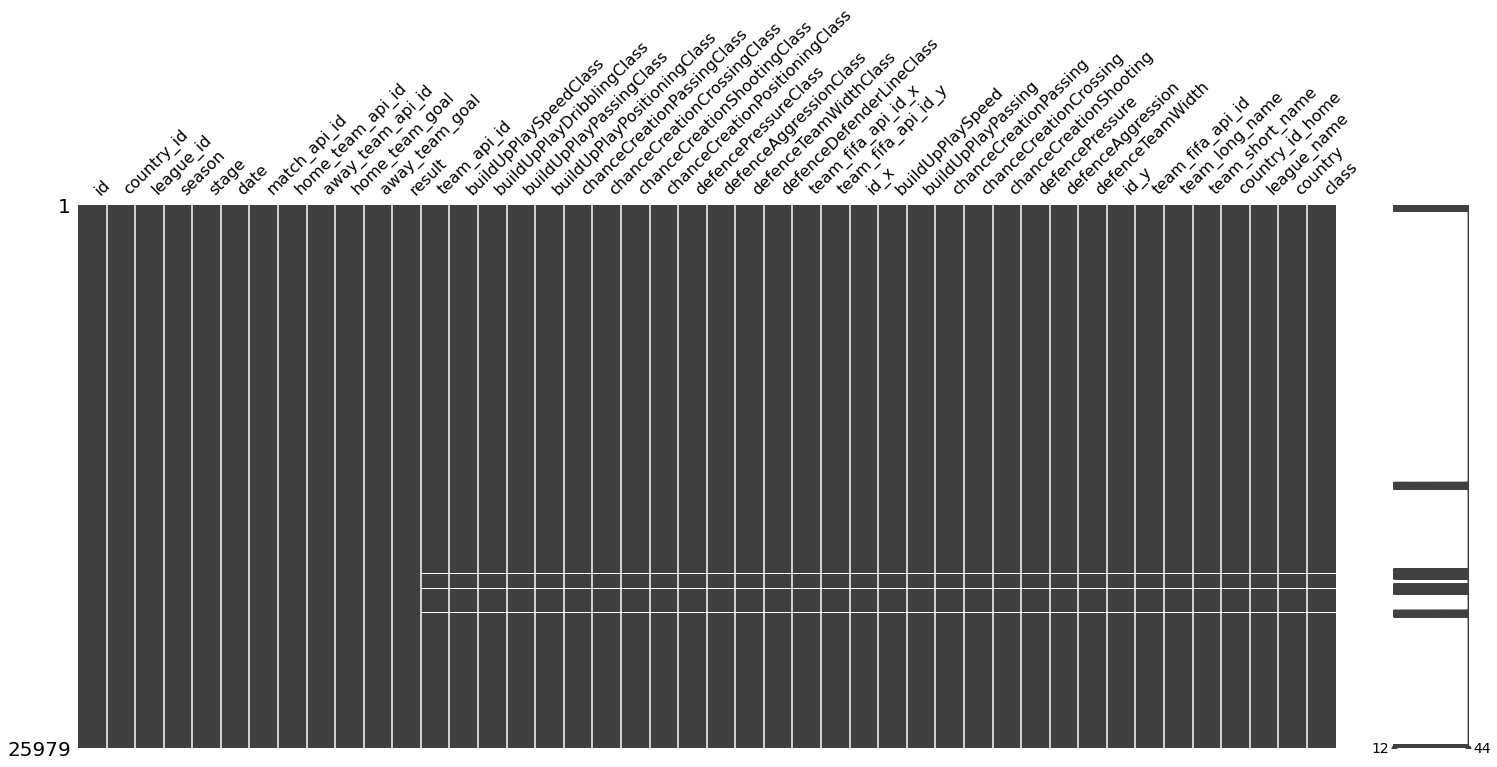

In [601]:
msno.matrix(match_final)

In [602]:
match_final.dropna(inplace=True)

In [603]:
match_final = match_final.merge(team_info_grouped, how='left',
                          left_on='away_team_api_id',
                         right_on='home_team_api_id',
                         suffixes=('', '_away'))

In [604]:
match_final.isna().sum()

id                         0
country_id                 0
league_id                  0
season                     0
stage                      0
                        ... 
country_id_away          172
home_team_api_id_away    172
league_name_away         172
country_away             172
class_away               172
Length: 77, dtype: int64

<AxesSubplot:>

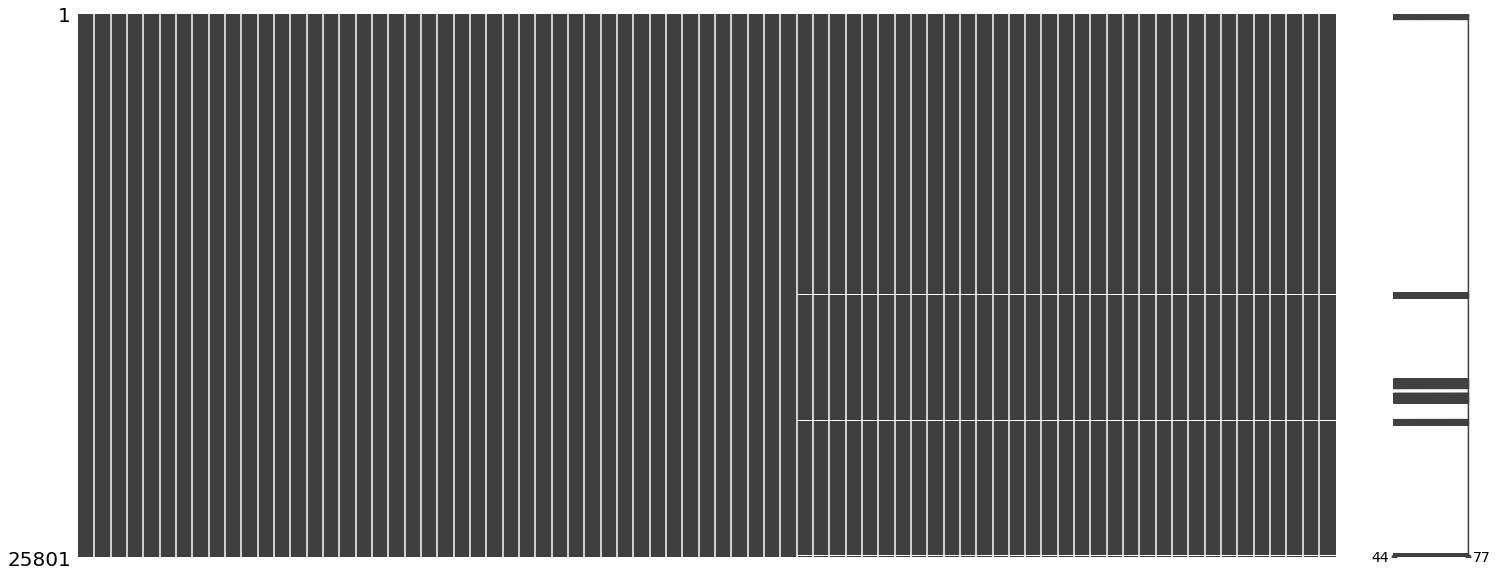

In [605]:
msno.matrix(match_final)

In [606]:
match_final.dropna(inplace=True)

### Feature Selection

In [607]:
irrelevant_features = ['league_id', 'home_team_api_id','away_team_api_id', 'id', 'country_id', 'match_api_id', 'team_api_id', 'team_fifa_api_id_x',
                      'team_fifa_api_id_y', 'id_x', 'id_y', 'team_fifa_api_id', 'team_short_name', 'country_id_home',
                      'league_name', 'class', 'team_api_id_away', 'team_fifa_api_id_x_away', 'team_fifa_api_id_y_away',
                      'id_x_away', 'id_y_away', 'team_fifa_api_id_away',
                      'team_short_name_away', 'country_id_away',
                       'home_team_api_id_away', 'league_name_away', 'class_away']

match_final.drop(irrelevant_features, axis=1, inplace=True)

In [608]:
match_final = match_final.set_index('date').sort_index()

### Data Preparation

In [609]:
X = pd.get_dummies(match_final.drop('result', axis=1), drop_first=True)

In [610]:
X_train = X[X.index < '2015-07-23'].drop(['home_team_goal', 'away_team_goal'], axis=1)
y_train = match_final[match_final.index < '2015-07-23']['result']
X_test = X[X.index > '2015-07-23'].drop(['home_team_goal', 'away_team_goal'], axis=1)
y_test = match_final[match_final.index > '2015-07-23']['result']

In [611]:
ss = StandardScaler()
numeric_cols = list(X.select_dtypes(include='float').columns)
X_train[numeric_cols] = ss.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = ss.transform(X_test[numeric_cols])

In [612]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

### Model Fitting

Before moving on with modelling, let's first see how a match usually ends. A match can be won by the home team, guest team, or it may result in a draw. Let's see the ratios of each of these outcomes in our dataset.

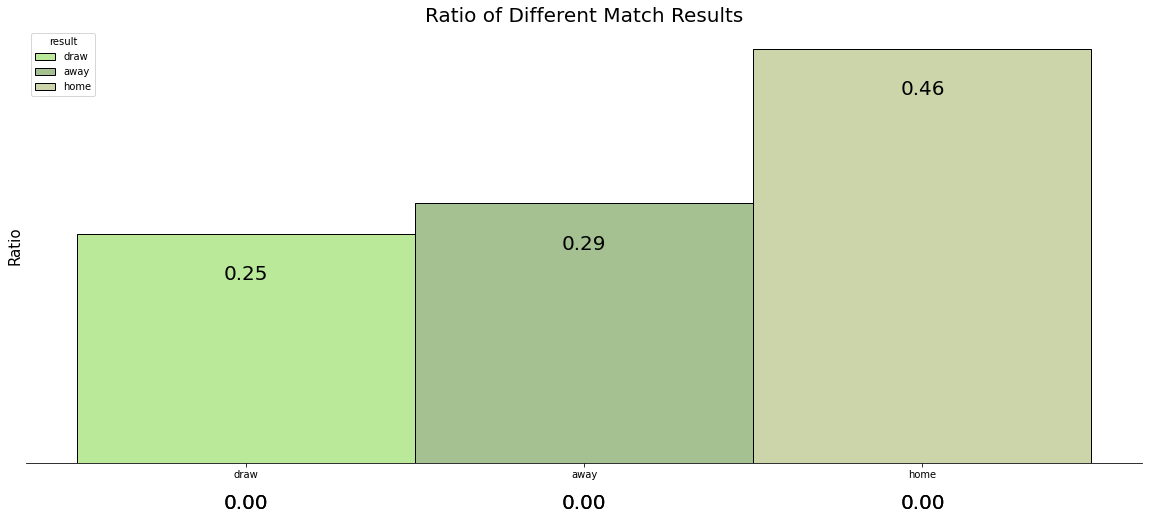

In [613]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.histplot(x='result', data=match, stat='density', hue='result', ax=ax)
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i],
             padding=-50, color='black', fontsize=20, fmt='%.2f')
plt.xlabel('')
plt.ylabel('Ratio', fontsize=15)
plt.title('Ratio of Different Match Results', fontsize=20)
ax.set_yticks([])
turn_spines_off(ax)

46 percent of all matches result in home team winning. This is a dramatic difference from the average rate of away team winning, which is 29 percent. Another 25 percent represents the matches that ended up in a draw. From this we can conclude that a team has a much better chance at winning when it's playing in its home stadium. Perhaps, this is a result of the support from the audience that they are getting at their home stadium. However, we do not have any data on this.

In [614]:
def fit_model(X_train, y_train, model):
    tscv = TimeSeriesSplit(n_splits=5)
    cv_results = cross_validate(model, X_train, y_train, cv=tscv, scoring=['precision_macro', 'recall_macro', 'f1_macro',
                                                                      'accuracy', 'roc_auc_ovr'], n_jobs=-1)
    return pd.DataFrame(cv_results).mean()

In [615]:
model = LogisticRegression(solver='saga', max_iter=2000)

In [616]:
fit_model(X_train, y_train, model)

fit_time                97.558075
score_time               0.030938
test_precision_macro     0.421664
test_recall_macro        0.418922
test_f1_macro            0.401197
test_accuracy            0.485592
test_roc_auc_ovr         0.615974
dtype: float64

We have an accuracy of 0.49, which is not really bad, considering that football matches are hard to predict thanks to their random nature. Roc auc score shows us how good the model is at determining different classes. This value is again is not bad considering the situation. Next, we will try to improve this result. 

In [617]:
model = LogisticRegression(C=0.6, solver='saga')

In [618]:
fit_model(X_train, y_train, model)

/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


fit_time                8.550279
score_time              0.022626
test_precision_macro    0.427861
test_recall_macro       0.419990
test_f1_macro           0.391784
test_accuracy           0.496124
test_roc_auc_ovr        0.621654
dtype: float64

A higher penalty resulted in slight improvement in scores. Perhaps, some columns are not contributing a lot to the model. We will try to fix this by determining which features are underperforming. 

In [620]:
model = LogisticRegression(C=0.6, solver='saga', penalty='l1')

In [621]:
fit_model(X_train, y_train, model)

/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


fit_time                13.528627
score_time               0.025779
test_precision_macro     0.425428
test_recall_macro        0.413961
test_f1_macro            0.372610
test_accuracy            0.498583
test_roc_auc_ovr         0.623269
dtype: float64

l1 penalty penalizes some features more harshly. In the end, some coefficients may reduced to zero. Effectively, they are eliminated from the model. In our case, this seems to improve our model slightly. 

In [622]:
n_components = np.arange(50, 700, 50)

for i in n_components:
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train)
    model = LogisticRegression(C=0.6, solver='saga', penalty='l1')
    results = fit_model(X_train_pca, y_train, model)
    print(f"Values for {i} n_components:\n {results}")

/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Values for 50 n_components:
 fit_time                0.998278
score_time              0.005905
test_precision_macro    0.401420
test_recall_macro       0.387430
test_f1_macro           0.328384
test_accuracy           0.482545
test_roc_auc_ovr        0.596654
dtype: float64


/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Values for 100 n_components:
 fit_time                2.209595
score_time              0.006606
test_precision_macro    0.406908
test_recall_macro       0.395701
test_f1_macro           0.342717
test_accuracy           0.486554
test_roc_auc_ovr        0.602169
dtype: float64


/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Values for 150 n_components:
 fit_time                3.269898
score_time              0.008301
test_precision_macro    0.416571
test_recall_macro       0.401452
test_f1_macro           0.353212
test_accuracy           0.486875
test_roc_auc_ovr        0.606775
dtype: float64


/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Values for 200 n_components:
 fit_time                4.717918
score_time              0.009095
test_precision_macro    0.411877
test_recall_macro       0.406401
test_f1_macro           0.359602
test_accuracy           0.490724
test_roc_auc_ovr        0.609515
dtype: float64


/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Values for 250 n_components:
 fit_time                4.752880
score_time              0.007748
test_precision_macro    0.409672
test_recall_macro       0.409947
test_f1_macro           0.367561
test_accuracy           0.491740
test_roc_auc_ovr        0.613986
dtype: float64


/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Values for 300 n_components:
 fit_time                5.963374
score_time              0.010444
test_precision_macro    0.426206
test_recall_macro       0.415616
test_f1_macro           0.376875
test_accuracy           0.496124
test_roc_auc_ovr        0.618016
dtype: float64


/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Values for 350 n_components:
 fit_time                6.938741
score_time              0.010460
test_precision_macro    0.427094
test_recall_macro       0.418122
test_f1_macro           0.382928
test_accuracy           0.496659
test_roc_auc_ovr        0.620039
dtype: float64


/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Values for 400 n_components:
 fit_time                7.756872
score_time              0.012386
test_precision_macro    0.424145
test_recall_macro       0.419720
test_f1_macro           0.386475
test_accuracy           0.497354
test_roc_auc_ovr        0.622771
dtype: float64


/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Values for 450 n_components:
 fit_time                8.859361
score_time              0.015450
test_precision_macro    0.425340
test_recall_macro       0.421328
test_f1_macro           0.388364
test_accuracy           0.498316
test_roc_auc_ovr        0.623892
dtype: float64


/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Values for 500 n_components:
 fit_time                9.506817
score_time              0.012940
test_precision_macro    0.423431
test_recall_macro       0.420921
test_f1_macro           0.387935
test_accuracy           0.498369
test_roc_auc_ovr        0.623915
dtype: float64


/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Values for 550 n_components:
 fit_time                10.788025
score_time               0.016050
test_precision_macro     0.428108
test_recall_macro        0.422278
test_f1_macro            0.389788
test_accuracy            0.499920
test_roc_auc_ovr         0.624206
dtype: float64


/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Values for 600 n_components:
 fit_time                12.075259
score_time               0.015801
test_precision_macro     0.426293
test_recall_macro        0.421559
test_f1_macro            0.388878
test_accuracy            0.499278
test_roc_auc_ovr         0.624204
dtype: float64


/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Values for 650 n_components:
 fit_time                12.528086
score_time               0.015198
test_precision_macro     0.425736
test_recall_macro        0.421723
test_f1_macro            0.388857
test_accuracy            0.499492
test_roc_auc_ovr         0.624214
dtype: float64


/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [623]:
pca = PCA(n_components=600)
X_train_pca = pca.fit_transform(X_train)
model = LogisticRegression(C=0.6, solver='saga', penalty='l1', max_iter=2000)
results = fit_model(X_train_pca, y_train, model)
print(f"Values for {i} n_components:\n {results}")

Values for 650 n_components:
 fit_time                121.448792
score_time                0.015910
test_precision_macro      0.424851
test_recall_macro         0.420866
test_f1_macro             0.392446
test_accuracy             0.496071
test_roc_auc_ovr          0.621766
dtype: float64


We will try to improve the model performance by hyperparameter tuning. 

In [624]:
model = LogisticRegression(solver='saga', n_jobs=-1)

In [625]:
tscv = TimeSeriesSplit(n_splits=5)

params = dict(C=np.linspace(0,1),
                     penalty=['l2', 'l1', 'elasticnet'],
             class_weight=['balanced', None],
             l1_ratio=np.linspace(0,1))

cv = RandomizedSearchCV(model, param_distributions=params,
                        n_iter=10, cv=tscv, n_jobs=-1, refit=True)

search = cv.fit(X_train, y_train)

/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warni

/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fet/opt/anaconda3/lib/pyt

/Users/fet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [626]:
search.best_estimator_

LogisticRegression(C=0.1020408163265306, l1_ratio=0.4081632653061224, n_jobs=-1,
                   solver='saga')

In [627]:
model = LogisticRegression(C=0.1020408163265306, l1_ratio=0.14285714285714285,
                   max_iter=2000, n_jobs=-1, penalty='elasticnet',
                   solver='saga')

In [628]:
model.fit(X_train, y_train)

LogisticRegression(C=0.1020408163265306, l1_ratio=0.14285714285714285,
                   max_iter=2000, n_jobs=-1, penalty='elasticnet',
                   solver='saga')

In [629]:
y_pred = model.predict(X_test)

In [630]:
confusion_matrix(y_pred, y_test)

array([[ 508,  287,  329],
       [  35,   43,   34],
       [ 423,  490, 1034]])

In [631]:
print(classification_report(le.inverse_transform(y_pred), le.inverse_transform(y_test)))

              precision    recall  f1-score   support

        away       0.53      0.45      0.49      1124
        draw       0.05      0.38      0.09       112
        home       0.74      0.53      0.62      1947

    accuracy                           0.50      3183
   macro avg       0.44      0.46      0.40      3183
weighted avg       0.64      0.50      0.55      3183



The classification model does its best job at predicting home and away values. For draw values, the model fails to capture the pattern behind them.

In [632]:
y_train_pred = model.predict(X_train)

In [633]:
confusion_matrix(y_train_pred, y_train)

array([[2757, 1364, 1249],
       [ 189,  266,  179],
       [3451, 4060, 8931]])

In [634]:
print(classification_report(le.inverse_transform(y_train_pred), le.inverse_transform(y_train)))

              precision    recall  f1-score   support

        away       0.43      0.51      0.47      5370
        draw       0.05      0.42      0.08       634
        home       0.86      0.54      0.67     16442

    accuracy                           0.53     22446
   macro avg       0.45      0.49      0.41     22446
weighted avg       0.74      0.53      0.60     22446



It looks like the model is overfitting to the home values. 

In [636]:
actual = pd.DataFrame(data = {'date': X_test.reset_index()['date'].values,
                              'outcome': le.inverse_transform(y_test)})

In [637]:
prediction = pd.DataFrame(data = {'date': X_test.reset_index()['date'].values,
                                  'outcome': le.inverse_transform(y_pred)})

In [639]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=actual['date'], y=actual['outcome'], name='Actual'))
fig.add_trace(go.Scatter(x=prediction['date'], y=prediction['outcome'], name='Prediction'))
fig.show()

While predictions are sometimes true, other times it is missing the mark by a lot. Most of the time the model does not predict any match as draw, which is its biggest shortcoming.

## Results

In this analysis, we have found out that our data was limited to some countries and leagues. Out of these leagues, we have discovered that, some teams were largely more successful than others in terms of average win ratios. Another important fact that we have discovered about teams is that teams were much more successful at their home stadiums than the stadiums where they are guests. However, the win ratios in different settings were parallel to each other, meaning that while most teams were less successful at home stadiums, their success as a guest was not dramatically different than their success at home. Successful teams at home protected their success largely as a guest. 

Team characteristics are important at understanding the background of the teams' success. We have found out that for many features, top and other teams did not have very large differences. However, we have discovered that top teams tend to be more conservative in terms of defence. Their players tend to bounce the ball less when dribbling. They have more preference towards near players for passings. While both types of teams prefer organized positionings, top teams tend to give their players more freedom in certain cases. 

From this we have decided to turn to individual players. In this section, we have discovered that some players were comparatively more succesful than others in terms of scoring goals. We have decided that this could be due to the extraordinary skill of the player, or due to the longevity of them. We also wanted to see, whether players playing for top teams had more goals in average. We have concluded this by making a hypothesis test, and our assumption was true.

Longevity question was worth extra investigation. We have analyzed several teams to see how consistent team rosters are. Here we have discovered that team rosters changed often. This fact disabled us to use player information in our prediction model, as we do not have the ability to know the team rosters in future.

After the data analysis, we built a machine learning model to predict the outcome of future matches. We have used logistic regression with different hyperparameters to find the best performance. Addition to that, we have tried PCA methods to compress our large feature set, however this method did not result in meaningful improvements. Our final model was relatively successful at predicting some matches but it failed at others. Due to the random nature of soccer matches, we have decided that our final scores were not extremely low. 

## Next Steps

One problem with our prediction model was that, while it could detect home or away team wins, it was not able to detect draws. In order to improve this model, we need to investigate the reason behind this and eliminate the factors that is causing this. 

We have only used linear models to make predictions. Perhaps other more complex models could detect the relationships better and result in higher scores. This project may have a better chance of improvement with more complex models. 

Lastly, we have tried PCA for feature reduction. This method did not result in model improvement. Other methods should be experimented with to see whether they improve the model. 